Pull in functions from VBD Functions to correlate global variables and mask NMME

In [1]:
from VBDFunctions import read_denv, dataURLs, openDAP, loadClimData, vcorr, sig_test, bootcorr, GridPCA, RegPCA,GridMean, correlate_grid, downloadNMME, maskForecast
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import forestci

Failed to import duecredit due to No module named 'duecredit'


In [2]:
#Other SIVIGLIA Data
from os import listdir
from os.path import isfile, join
import seaborn as sns

mypath = '/Users/maxbeal/Desktop/SIVIGLIA/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

siviglia=[]
for file in onlyfiles:
    s=pd.read_csv(mypath+file)
    s['date'] = pd.to_datetime(s['ANO'].astype(str) + s['SEMANA'].astype(str) + '1', format='%Y%W%w')
    s=s.set_index('date')
    df = s[s.iloc[:,1]=='DENGUE']
    
    
    columnstokeep=['Nombre','Nombre_evento','conteo_casos','conteo','nom_mun','Municipio_ocurrencia']
    sdf=df[df.columns.intersection(columnstokeep)]
    sdf.columns = ['name','city','cases']
    
    siviglia.append(sdf)

sdf=pd.concat(siviglia)
sdf['month']=sdf.index.month

#sdf.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/siviglia_denv.csv')
sdf.cases.resample('1M').sum().plot()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/maxbeal/Desktop/SIVIGLIA/'

In [2]:
#1. Read in predictors
path = '~/Desktop/PhD/Amazon/Data/'
pdt, cities = read_denv(path,metric='incidence',incidence_per=100000) #Predictands, cities gdf

#Other SIVIGILA data
sdf=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/sivigila_denv.csv')


pdt
#pdt.to_csv('~/Desktop/DENV_incidence_per_100000.csv')

medellin
cucuta
cali
leticia


city month  year      cases
0   medellin     1  2010   1.980326
1   medellin     1  2011   1.190737
2   medellin     1  2012   0.610110
3   medellin     1  2013   1.603012
4   medellin     1  2014   2.212097
..       ...   ...   ...        ...
8    leticia    12  2016   1.801196
9    leticia    12  2017   1.906714
10   leticia    12  2018   4.726705
11   leticia    12  2019  47.323537
12   leticia    12  2020   5.819909

[630 rows x 4 columns]

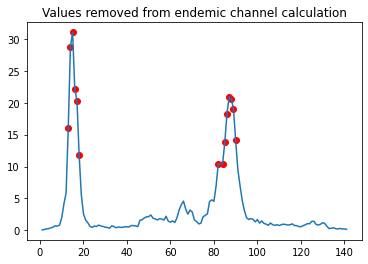

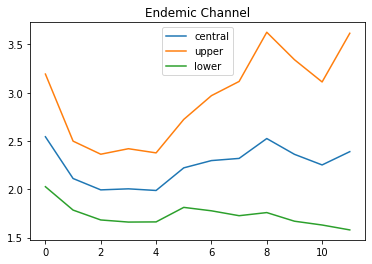

In [4]:
from VBDFunctions import endemic_channel #From Mauricio epiCo
ec = endemic_channel(pdt,'medellin',outliers=0.9)

Download and correlate

Correlating January cases with July climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating February cases with August climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating March cases with September climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating April cases with October climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating May cases with November climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating June cases with December climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating July cases with January climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating August cases with February climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


Correlating September cases with March climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating October cases with April climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating November cases with May climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating December cases with June climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:680: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


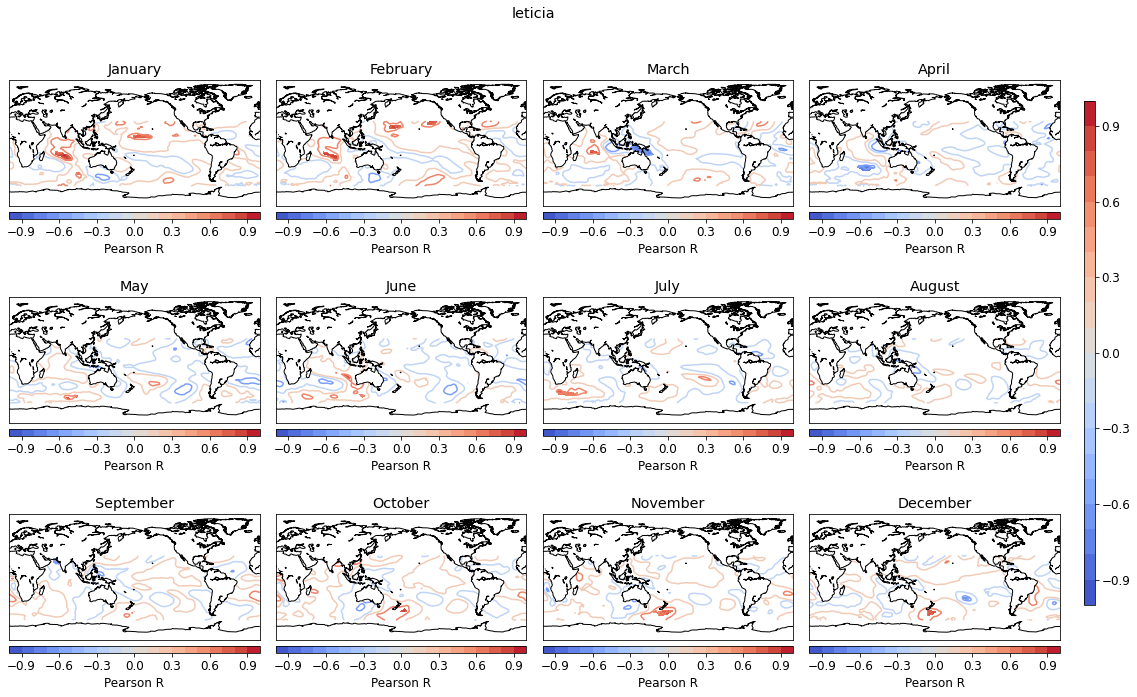

Correlating January cases with July climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating February cases with August climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating March cases with September climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating April cases with October climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating May cases with November climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating June cases with December climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating July cases with January climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating August cases with February climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating September cases with March climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating October cases with April climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/maxbeal/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Correlating November cases with May climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating December cases with June climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:680: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


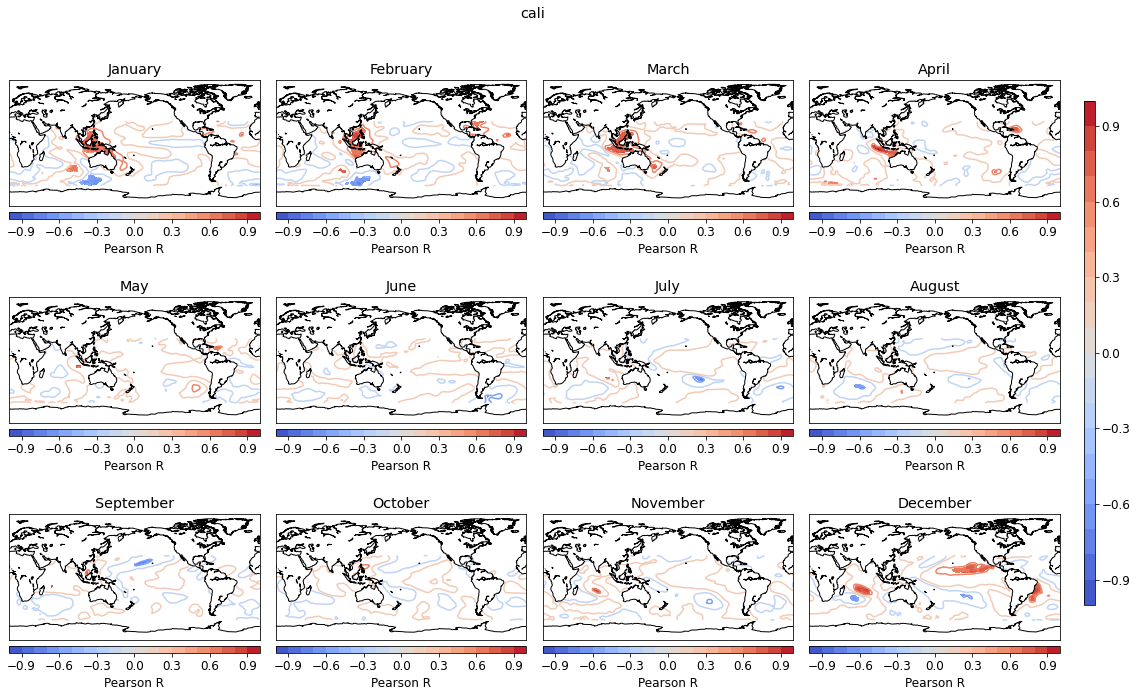

Correlating January cases with July climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating February cases with August climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating March cases with September climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating April cases with October climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating May cases with November climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating June cases with December climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/maxbeal/opt/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Correlating July cases with January climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating August cases with February climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating September cases with March climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating October cases with April climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating November cases with May climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating December cases with June climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:680: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


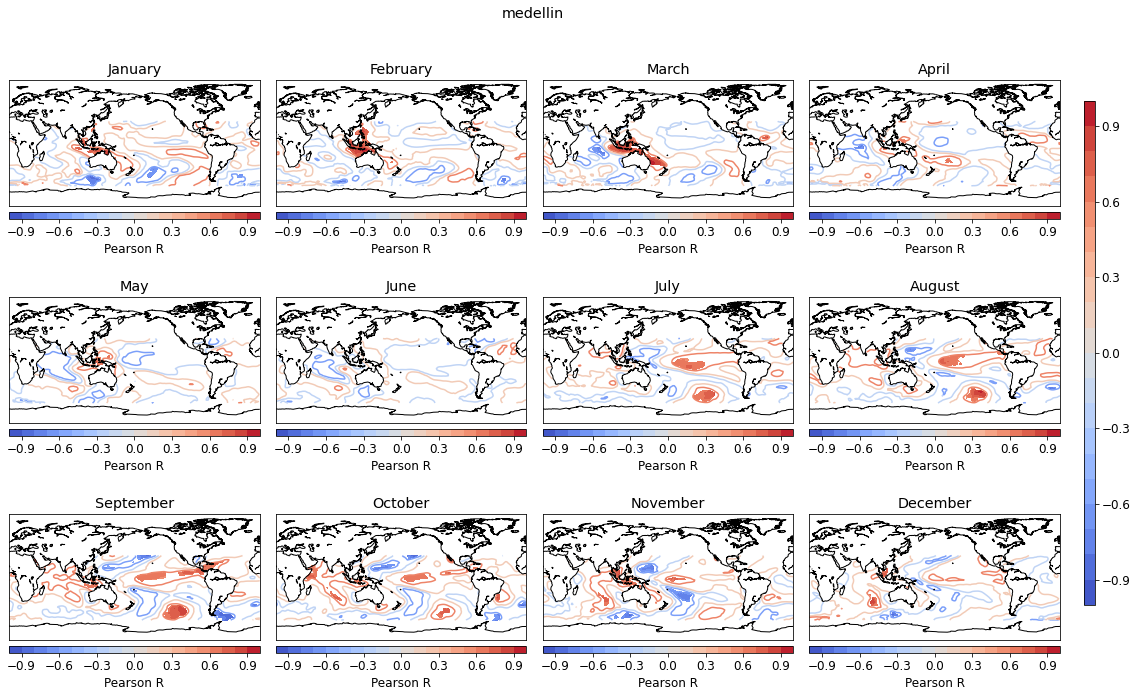

Correlating January cases with July climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating February cases with August climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating March cases with September climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating April cases with October climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating May cases with November climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating June cases with December climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating July cases with January climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating August cases with February climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating September cases with March climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating October cases with April climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating November cases with May climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)


Correlating December cases with June climate


/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:260: RuntimeWarning: Mean of empty slice
  Xm = np.nanmean(X,axis = 1).reshape(ngrid,1)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:264: RuntimeWarning: invalid value encountered in true_divide
  r = (r_num/r_den).reshape(nlat, nlon)
/Users/maxbeal/Desktop/PhD/Amazon/VBDFunctions.py:680: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


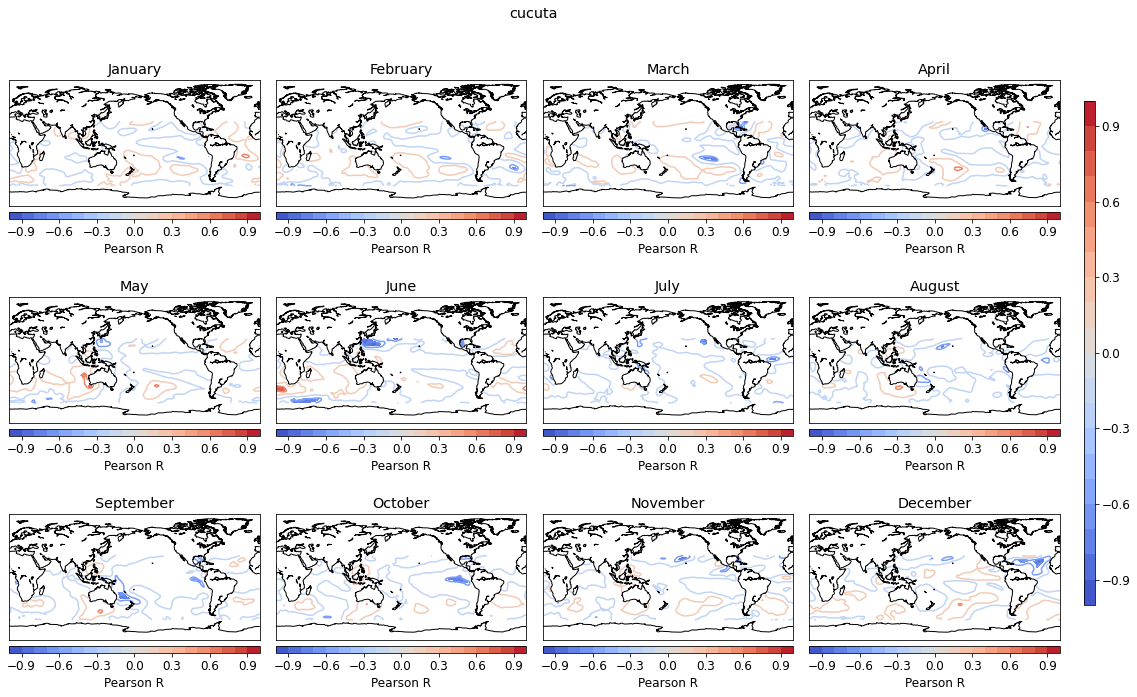

In [7]:
download=False
if download:
    #2. Download observations and correlate
    urls, variables, names = dataURLs(sstA=False,gph=False,gphMb=[200],znl=True,znlMb=[850])
    openDAP(urls=urls, variable=variables,names=names, startyear=2006, endyear=2021, startmon=1, endmon=12)
else:
    #3. Correlations and load data
    urls, variables, names = dataURLs(sstA=True,gph=False,gphMb=[200],znl=False,znlMb=[850])
    dataframes, lonframe, latframe, dtframe = loadClimData(names)
   
correlate=True 
if correlate:
    #Choose var for correlation, note lag = 1 is concurrent
    correlate_grid(predictands=pdt, dataframes=dataframes[0], latList=latframe[0], lonList=lonframe[0],cities=cities, dtframe=dtframe[0], 
                   map_global=True,variable='sst',varname='test', lag = 7, fontsize=12)

Lagged climate predictors

In [42]:
Lagnames=['GPH200_lag6_I','SST_lag6_I']
for name in Lagnames:
    #Choose pathways and files
    path = '/Users/maxbeal/Desktop/PhD/Amazon/Data/DENV_preds/'
    Clag=pd.read_csv(path+name+'.csv')
    column_mapping = {'0':name+'PC1','1':name+'PC2','2':name+'PC3','3':name+'PC4'}
    Clag.rename(columns=column_mapping,inplace=True)  
    print(Clag)
    Clag = pd.melt(Clag,id_vars=['city','month','year'],value_vars=[col for col in Clag.columns if 'PC' in col])

Clag

     Unnamed: 0  GPH200_lag6_IPC1      means      city  month  year  \
0             0         -0.785392  12493.677   leticia      1  2009   
1             1         -1.170849  12516.044   leticia      1  2010   
2             2         -0.119479  12444.044   leticia      1  2011   
3             3         -0.895120  12462.955   leticia      1  2012   
4             4         -1.078180  12489.556   leticia      1  2013   
..          ...               ...        ...       ...    ...   ...   
625           7          0.614423  12071.828  medellin     12  2016   
626           8          0.068068  12006.549  medellin     12  2017   
627           9         -0.291896  12023.588  medellin     12  2018   
628          10         -0.064096  12061.715  medellin     12  2019   
629          11         -0.717817  12040.179  medellin     12  2020   

     GPH200_lag6_IPC2  GPH200_lag6_IPC3  GPH200_lag6_IPC4  
0                 NaN               NaN               NaN  
1                 NaN      

city  month  year       variable     value
0      leticia      1  2009  SST_lag6_IPC1  0.213224
1      leticia      1  2010  SST_lag6_IPC1 -0.360403
2      leticia      1  2011  SST_lag6_IPC1 -0.367059
3      leticia      1  2012  SST_lag6_IPC1 -0.305232
4      leticia      1  2013  SST_lag6_IPC1 -0.008732
...        ...    ...   ...            ...       ...
2515  medellin     12  2016  SST_lag6_IPC4       NaN
2516  medellin     12  2017  SST_lag6_IPC4       NaN
2517  medellin     12  2018  SST_lag6_IPC4       NaN
2518  medellin     12  2019  SST_lag6_IPC4       NaN
2519  medellin     12  2020  SST_lag6_IPC4       NaN

[2520 rows x 5 columns]

Identify ENSO Regions

Get ENSO from NMME

In [43]:
#NINO34
urls = ['https://psl.noaa.gov/data/correlation/nina1.data',
        'https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino3.long.data',
        'https://psl.noaa.gov/data/correlation/nina34.data',
       'https://psl.noaa.gov/data/correlation/nina4.data']

enso_obs = []
for url in urls:
    NINO=pd.read_csv(url)
    NINO.columns = ['nino']
    f = lambda x: x.nino.split()
    nino=NINO.apply(f,axis=1)
    NINO=pd.DataFrame(np.stack(nino[:-5])) #drop 2023
    NINO.columns = ['year',1,2,3,4,5,6,7,8,9,10,11,12]
    NINO=NINO.astype(float)
    NINO=NINO[(NINO.year>=2005) & (NINO.year<=2021)].reset_index(drop=True)
    enso_obs.append(NINO)
    

#Choose lag for ENSO regions
ChooseLag = 6



enso_lag = enso_obs
regionName = ['Nino 1+2','Nino 3','Nino 3.4','Nino 4']
for i, name in enumerate(regionName):
    enso_lag[i]['region'] = name
    
enso_lag=pd.concat(enso_lag)
enso_lag = pd.melt(enso_lag,id_vars=['year','region'])
enso_lag.columns = ['year','region','month','value']


enso_lag['datetime'] = pd.to_datetime(dict(year=enso_lag.year, month=enso_lag.month, day=1))
enso_lag['target_month']=enso_lag.datetime+pd.DateOffset(months=ChooseLag)

enso_lag['year']=enso_lag['target_month'].dt.year
enso_lag['target_month']=enso_lag['target_month'].dt.month
enso_lag=enso_lag.drop(['datetime','month'],axis=1)
enso_lag.columns = ['year','region','value','month']


enso_lag_input=pd.merge(pdt,enso_lag,on=['month','year'])
enso_lag_input['region']=enso_lag_input.region +'_lag_'+str(ChooseLag)
enso_lag_input.columns = ['city','month','year','cases','variable','value']


In [28]:
#4. Download NMME
#Choose ulrs
from VBDFunctions import largest_continuous_false_group, downloadNMME, haversine, nearest_point
import matplotlib.pyplot as plt
import pandas as pd

#GPH
#    urls=['http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.MONTHLY/.h200/%5BM+%5Daverage/dods',
# 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.h200%5BM%5Daverage/dods']

urls = ['http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.HINDCAST/.MONTHLY/.h200/%5BM+%5Daverage/dods',
       'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NASA-GEOSS2S/.FORECAST/.MONTHLY/.h200/%5BM+%5Daverage/dods']

#Min Temp
#    urls = ['http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.MONTHLY/.t_ref_min/Y/%285S%29%2810N%29RANGEEDGES/X/%2881W%29%2850W%29RANGEEDGES/%5BM+%5Daverage/dods',
#     'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.t_ref_min/Y/%285S%29%2810N%29RANGEEDGES/X/%2881W%29%2850W%29RANGEEDGES/%5BM+%5Daverage/dods']

#SST
#    urls=['http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.HINDCAST/.MONTHLY/.sst/%5BM+%5Daverage/dods',
#        'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.GFDL-SPEAR/.FORECAST/.MONTHLY/.sst/%5BM+%5Daverage/dods']

#Be sure to choose correct lead time and name
download_NMME=False
if download_NMME:
    urls=urls
    downloadNMME(urls=urls, lead=5.5, savename='NASA_GEOSS2S_GPH200_6mo') #Choose lead time (#mo - 0.5)


NMME Models for 6 month lead


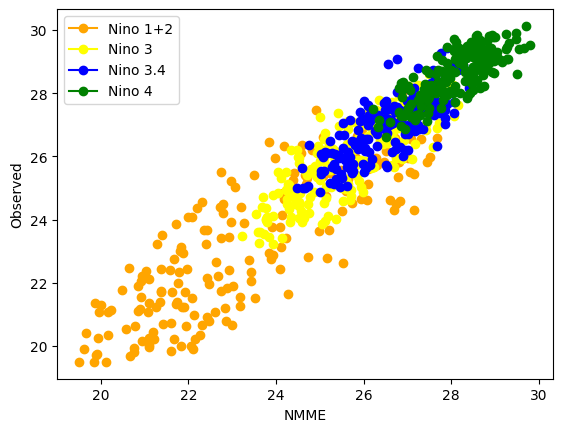

In [44]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.stats import pearsonr
#ENSO masking function

#CHECK LEAD TIME
ChooseLag = 6

print('NMME Models for ' + str(ChooseLag) +' month lead')

#Read nmme data and mask data in
p = '/Volumes/Data Drive/Colombia/NMME/'
f='GFDL_SPEAR_SST_'+str(ChooseLag)+'mo.npy'
nmme_data=np.load(p+f)
nmme_data[nmme_data<-1.8] = -1.8

#Read date metadata
f='GFDL_SPEAR_SST_'+str(ChooseLag)+'mo_time.csv'
nmme_meta = pd.read_csv(p+f)
S = pd.to_datetime(nmme_meta['target'])

def maskForecastENSO(nmme_data,dateDf,enso_obs):
    alldata = []
    nmme_data = nmme_data[:,:,~dateDf.duplicated(keep='first')] #get rid of duplicate dates(keep first)
    dateDf = dateDf[~dateDf.duplicated(keep='first')]
    months = np.linspace(1,12,12)
    
    lats=np.linspace(-90,90,181)
    lons=np.linspace(0,359,360)
    
    #ESNO Regions
    region_1_2 = np.array([[-10, 0], [-90+360, -80+360]])
    region_3 = np.array([[-5, 5], [-150+360, -90+360]])
    region_3_4 = np.array([[-5, 5], [-170+360, -120+360]])
    region_4 = np.array([[-5, 5], [-200+360, -150+360]])
    
    masksave = [region_1_2,region_3,region_3_4,region_4]
    
    #Iterate through each region
    regions=[]
    colors=['orange','yellow','blue','green']
    regionName = ['Nino 1+2','Nino 3','Nino 3.4','Nino 4']
    
    frameSave=[]
    
    for i in range(0,len(masksave)):
        for month in months:
            mask = masksave[i]

            #subset ENSO
            latmask = (lats > mask[0][0]) & (lats < mask[0][1])
            lonmask = (lons > mask[1][0]) & (lons < mask[1][1])

            #subset time
            Tdata=(dateDf.dt.year>=2006) & (dateDf.dt.year<=2021) & (dateDf.dt.month==month)
            lat_idx, lon_idx, t_idx = np.ix_(latmask, lonmask, Tdata) 
            
            years_select = dateDf[(dateDf.dt.year>=2006) & (dateDf.dt.year<=2021) & (dateDf.dt.month==month)].dt.year
            
            doi = nmme_data[lat_idx,lon_idx,t_idx]

            #Average over space
            timeseries = np.nanmean(doi,axis=(0,1))
            
            preds=pd.DataFrame({'year':years_select,'nmme':timeseries})
            
            regions.append(timeseries)

            
            enso_sub = enso_obs[i][(enso_obs[i].year>=np.min(years_select)) & (enso_obs[i].year<=np.max(years_select))]
            obs = enso_sub[['year',month]]
            
            frame=pd.merge(obs,preds)
            frame['month'] = month
            frame['region']=regionName[i]
            frameSave.append(frame)
            
            
            plt.scatter(frame['nmme'],frame[month],c=colors[i])
    
    
    legend_elements = [Line2D([0], [0], marker='o', color='orange', label='Nino 1+2'),
                  Line2D([0], [0], marker='o', color='yellow', label='Nino 3'),
                  Line2D([0], [0], marker='o', color='blue', label='Nino 3.4'),
                  Line2D([0], [0], marker='o', color='green', label='Nino 4')]
    plt.legend(handles=legend_elements)
    plt.xlabel('NMME')
    plt.ylabel('Observed') 
    plt.show()
    
    ENSO = pd.DataFrame(np.concatenate(frameSave))
    ENSO.columns = ['year','obs','preds','month','region']
    
    
    return ENSO
        
        
enso = maskForecastENSO(nmme_data,S,enso_obs)

df = pd.merge(enso,pdt)



#Figures
#enso_obs_cor = df.groupby(['region','city'])[['obs','cases']].apply(lambda d:pd.Series(pearsonr(d.obs, d.cases), index=["corr", "pval"]))
#enso_obs_cor['corr'].plot(kind='bar',figsize=(15,4))
#plt.show()
#enso_pred_cor = df.groupby(['region','city'])[['preds','cases']].apply(lambda d:pd.Series(pearsonr(d.preds, d.cases), index=["corr", "pval"]))
#enso_pred_cor['corr'].plot(kind='bar',figsize=(15,4))
#plt.show()

enso_input = df[['city','month','year','cases','preds','region']]
enso_input.columns = ['city','month','year','cases','value','variable']


NMME Inputs

In [ ]:
NMMEmodels

In [45]:
from VBDFunctions import largest_continuous_false_group, downloadNMME, haversine, nearest_point, filter_files, process_nmme
import os

nmme_input=[]

ChooseLag = 6

variables = ['TMIN','TMAX','GPH200']
NMMEmodels = ['GFDL_SPEAR','GFDL_SPEAR','NASA_GEOSS2S']
mapping = [False,False,True]


for run, name in enumerate(variables):
    
    '''
    This is a function that returns the necessary files to access NMME outputs for different environmental variables.
    Make sure the modelname and varname inputs match file naming conventions.
    '''
    directory_path = "/Volumes/Data Drive/Colombia/NMME/"
    fn, flat, flon, ftime = filter_files(directory_path, modelname=NMMEmodels[run],varname=name,lag=ChooseLag)


    '''
    This is a function that takes local or global scale NMME and masks out the regions of interest.
    If doing global masking, make sure variable name matches the naming conventions in the dataMasks files. 
    '''
    p = '/Volumes/Data Drive/Colombia/dataMasks/'
    nmme = process_nmme(nmme_p = directory_path, mask_p=p,  f=fn, flat=flat, flon=flon, ftime=ftime,
                        map_global=mapping[run], varname=name, denv_metric='incidence')
    
    if mapping[run]: #global
        column_mapping = {0:name+'PC1',1:name+'PC2',2:name+'PC3',3:name+'PC4'}
        nmme.rename(columns=column_mapping,inplace=True)  
        nmme = pd.melt(nmme,id_vars=['city','month','year'],value_vars=[col for col in nmme.columns if 'PC' in col])
    else:       
        nmme.columns=['month','year','city',name]
        nmme = pd.melt(nmme,id_vars=['city','month','year'],value_vars=[name])
    nmme_input.append(nmme)


nmme=pd.concat(nmme_input)
nmme=pd.merge(nmme,pdt,on=['city','month','year'])

GFDL_SPEAR_TMIN_6mo.npy
medellin
cucuta
cali
leticia
Nearest point: [  3. -77.]
Nearest point: [  8. -73.]
Nearest point: [ -4. -70.]
Nearest point: [  6. -76.]
GFDL_SPEAR_TMAX_6mo.npy
medellin
cucuta
cali
leticia
Nearest point: [  3. -77.]
Nearest point: [  8. -73.]
Nearest point: [ -4. -70.]
Nearest point: [  6. -76.]
NASA_GEOSS2S_GPH200_6mo.npy
loading: GPH200.npy masks


In [11]:
#Look at obs/nmme performance
sst = pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/DENV_preds/sst.csv')
test=pd.merge(sst,nmme,on=['city','month','year'])
#test.columns = ['none','pc1s','city','month','year','pc2s','pc3s','pc3s','pc1n']

import pandas as pd

def var_validation(df, variable1, variable2):
    # Extract month and year from the 'date' column
    # Group by month and city, then calculate the mean for each group
    means = df.groupby(['month', 'city'])[[variable1, variable2]].mean().reset_index()

    # Calculate Pearson correlation
    correlation = df.groupby(['city','month'])[[variable1, variable2]].corr().iloc[0::2,-1]
    
    return correlation, means

cors, means = var_validation(test,'means_x','means_y')

cors.plot(kind='bar',figsize=(20,4))
plt.show()
test[['means_x','means_y']].plot()
plt.show()

#With cases
test2=pd.merge(test,pdt,on=['city','month','year'])
cors, means = var_validation(test2,'cases','means')
cors.plot(kind='bar',figsize=(20,4))
plt.show()

test2=pd.merge(test,pdt,on=['city','month','year'])
cors, means = var_validation(test2,'cases','means')
cors.plot(kind='bar',figsize=(20,4))
plt.show()


plt.scatter(test['means_x'],test['means_y'])

KeyError: "Columns not found: 'means_y', 'means_x'"

Autoregressive predictors

In [41]:
#Apply to models
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

pdt = pdt.sort_values(['year','month'])

def r2(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    mean_actual = np.mean(actual)
    tss = np.sum((actual - mean_actual) ** 2)
    rss = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (rss / tss)
    return r_squared

def persistence_model(pdt,lag,plots=True):
    #Persistence Model
    hold = pdt[pdt['city'] == city]
    values = pd.DataFrame(hold.cases)
    dataframe = pd.concat([values.shift(lag), values], axis=1)
    dataframe.columns = ['t-'+str(lag), 't+'+str(lag)]
    dv = dataframe.values[lag:] #remove NaN
    X, y = dv[:,0], dv[:,1]

    def model_persistence(x):
         return x
    predictions = list()
    for x in X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    print('Persistence')
    test_score = mean_squared_error(y, predictions)
    print('Test MSE: %.3f' % test_score)
    R, p = pearsonr(y, predictions)
    print('Test R: %.3f' % R)
    R2 = r2(y_test,y_pred)
    print('Test R2: %.3f' % R2)
    if plots:
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
        ax=ax.ravel()
        ax[0].plot(y, label='observed')
        ax[0].plot(X, label='predicted')
        ax[0].legend()
        
        ax[1].scatter(X,y)
        
        plt.show()

        


def create_autoregressive_model(pdt, lags, lagstart = 1,test_size=0.2,plots=True):
    hold = pdt[pdt['city'] == city]
    values = pd.DataFrame(hold.cases)
    
    # Create a pandas DataFrame
    df = values

    # Lag the time series to create autoregressive features
    for lag in range(lagstart, lags + 1):
        df[f'lag_{lag}'] = df['cases'].shift(lag)
        df[f'lag_{lag}'][np.isnan(df[f'lag_{lag}'])] = np.nanmean(df['cases'])

    # Drop missing values due to lagging
    predictors=pd.concat([hold[['city','month','year']],df],axis=1)
    df = df.dropna()

    splits = int(1/test_size)
    kf = KFold(n_splits=splits, shuffle=False)
    yp, yo = [], []
    for fold, (train_index, test_index) in enumerate(kf.split(df)):
        train_data, test_data = df.iloc[train_index], df.iloc[test_index]
        # Define independent variables (lags) and the dependent variable
        X_train = train_data.iloc[:, 1:]
        y_train = train_data['cases']
        X_test = test_data.iloc[:, 1:]
        y_test = test_data['cases']
        

        # Fit the autoregressive model using Linear Regression
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        yp.append(y_pred)
        yo.append(y_test)
    
    y_pred=np.concatenate(yp)    
    y_test=np.concatenate(yo)
    
    d={'city':city,'month':hold.month,'year':hold.year,'cases':hold.cases,'ARpredictions':y_pred}
    predictions=pd.DataFrame(d)
    
    print('AR model')
    test_score = mean_squared_error(y_pred,y_test)
    print('Test MSE: %.3f' % test_score)
    R, p = pearsonr(y_pred, y_test)
    print('Test R: %.3f' % R)
    R2 = r2(y_test,y_pred)
    print('Test R2: %.3f' % R2)

    if plots:
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
        ax=ax.ravel()
        # Plot the actual vs predicted values
        ax[0].plot(y_test, label='Actual')
        ax[0].plot(y_pred, label='Predicted')
        ax[0].set_xlabel('months')
        ax[0].set_ylabel('DENV cases')
        ax[0].legend()
        
        ax[1].scatter(y_test,y_pred)
        plt.suptitle(city)
        plt.show()
        
    
    return predictions, predictors



#######
#Choose lag
chooselag = 6

print('AR Models for ' + str(chooselag) +' month lead')


ARsave=[]
ARpred=[]
autocor_plots=False 
for city in ['medellin','cucuta','cali','leticia']:
    print(city)
    if autocor_plots:
        hold = pdt[pdt['city'] == city]
        values = pd.DataFrame(hold.cases)
        autocorrelation_plot(values)
        plt.xlim(0,15)
        plt.show()
    
    #persistence_model(pdt,lag=3,plots=True)
    ypred, out = create_autoregressive_model(pdt,lags=chooselag,lagstart=chooselag,plots=False)
    ARsave.append(out)
    ARpred.append(ypred)

ar_results = pd.concat(ARpred)
ar_input = pd.concat(ARsave)
ar_input=pd.melt(ar_input,id_vars=['city','month','year','cases'],value_vars=['lag_'+str(chooselag)])



AR Models for 6 month lead
medellin
AR model
Test MSE: 37.399
Test R: -0.137
Test R2: -0.188
cucuta
AR model
Test MSE: 35.167
Test R: 0.187
Test R2: -0.009
cali
AR model
Test MSE: 43.952
Test R: 0.100
Test R2: -0.016
leticia
AR model
Test MSE: 923.449
Test R: -0.395
Test R2: -0.101


Observed lagged predictors

In [47]:
obsl=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/DENV_preds/Obslag6.csv')

obsl=obsl.drop('Unnamed: 0',axis=1)


Combine predictor frames

In [8]:
#1. Read in predictors
path = '~/Desktop/PhD/Amazon/Data/'
pdt, cities = read_denv(path,metric='incidence') #Predictands, cities gdf

#pred_df = pd.concat([ar_input,nmme,enso_input,Clag,enso_lag_input,obsl])
predictands = pdt

pred_df = pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/LeadTimePreds/'+'Predictors_1MLead_incidence')
pred_df.drop(['Unnamed: 0'],axis=1,inplace=True)
varlist=pred_df.variable.unique().tolist()

name_match = ['SST','TMAX','TMIN','GPH','Nino',"Temperature","Temeprature","TMIN","TMAX",'Precipitation','Humidity',"Streamflow",'GPH',"SST","Nino","SPI"]
NMME = [name for name in varlist if any(x in name for x in name_match) and 'lag' not in name]
Lag = matches = [name for name in varlist if any(x in name for x in name_match) and 'lag' in name]
AR = matches = [name for name in varlist if not any(x in name for x in name_match)]

PredictorSourceDict = {
    'Autoregressive':AR,
    'NMME':NMME,
    'Lagged':Lag
    
}

print(AR)

TempMatch = ["Temperature","Temeprature","TMIN","TMAX"]
HydroMatch=['Precipitation','Humidity',"Streamflow","SPI"]
GlobalMatch = ['GPH',"SST","Nino"]

Vtemp = [name for name in varlist if any(x in name for x in TempMatch)]
Vhydro = [name for name in varlist if any(x in name for x in HydroMatch)]
Vglobal= [name for name in varlist if any(x in name for x in GlobalMatch)]
AR = matches = [name for name in varlist if not any(x in name for x in TempMatch+ HydroMatch+GlobalMatch+ name_match)]




PredictorTypeSourceDict = {
    'Autoregressive':AR,
    'Hydrology':Vhydro,
    'Temperature': Vtemp,
    'Global Scale':Vglobal
}
#pred_df.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/LeadTimePreds/'+'Predictors_6MLead_incidence')



Vhydro, Vtemp, Vglobal
varlist

medellin
cucuta
cali
leticia
['lag_1']


['lag_1',
 'TMIN',
 'TMAX',
 'GPH200PC1',
 'GPH200PC2',
 'GPH200PC3',
 'Nino 1+2',
 'Nino 3',
 'Nino 3.4',
 'Nino 4',
 'SST_lag1_IPC1',
 'SST_lag1_IPC2',
 'SST_lag1_IPC3',
 'SST_lag1_IPC4',
 'Nino 1+2_lag_1',
 'Nino 3_lag_1',
 'Nino 3.4_lag_1',
 'Nino 4_lag_1',
 'Precipitation (mm)_lag1',
 'Mean. Rel. Humidity (%)_lag1',
 'Max. Rel. Humidity (%)_lag1',
 'Nino 3_lag1',
 'Nino 3.4_lag1',
 'Nino 4_lag1',
 'Min. Rel. Humidity (%)_lag1',
 'Max. Temperature (C)_lag1',
 'Mean Temeprature (C)_lag1',
 'Min. Temperature (C)_lag1',
 'SPI_lag1',
 'Nino 1+2_lag1']

Random Forest Model

In [42]:
import arviz as az
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import PoissonRegressor
import forestci as fci
import warnings
warnings.filterwarnings("ignore", message="X has feature names, but DecisionTreeRegressor was fitted without feature names")

#Function for neg_binom dist
def neg_binom_fit(x, r, p):
    return nbinom.pmf(x, r, p)

def add_columns(row,col):
    result = 0
    if row['Mtype'] == 'Random Forest':
        return max(row[col] + row['preds'],0)
    else:
        return max(row[col], 0)
    

def build_model(city, pred_df, ar_results):
    
    ar_comp = ar_results[ar_results.city==city] #Get AR for comparison
    
    infoStore = []
    trace_list=[]
    predList = []
    distList = []
    Mtype=[]
    importance=[]
    upper=[]
    lower=[]
    predictions=[]
    CorTables=[]

    for month in set(pred_df['month']):

        x = pred_df[(pred_df['city'] == city) & (pred_df['month']==month)]
        
        x=x.drop('cases',axis=1)
        
        y =predictands[(predictands['city'] == city) & (predictands['month']==month)]

        #Adjust percent nans
        x=x.pivot(columns='variable',index=['city','month','year'])
        
        prop_nans=0.7
        coldrop = x.isna().sum(axis=0)<prop_nans*len(x)
        x=x[x.columns[coldrop]]

        ind=x.index.get_level_values('year')

        x.columns = x.columns.get_level_values(1)
        x=x.reset_index(drop=True)
        x['year']=ind
        x=x.dropna()

        y=y[y.year.isin(x.year)]

        x=x.drop('year',axis=1)
        x=x.drop_duplicates()
        
        x.reset_index(drop=True,inplace=True)
        y.reset_index(drop=True,inplace=True)
        
        #Get rid of streamflow
        if (city!='leticia'):
            columns_to_drop = [col for col in x.columns if 'Streamflow' in col]
            #print(columns_to_drop)
            x = x.drop(columns=columns_to_drop)
        
        infoStore.append(y[['city','month','year']])

        chooseCols =[]
        corTbl=[]
        for series_name, series in x.items():
            chooseCols.append(stats.pearsonr(series,y['cases'])[1]<0.05)
            corTbl.append(stats.pearsonr(series,y['cases']))


        corTbl=pd.DataFrame(corTbl)
        corTbl['variable']=x.columns
        corTbl['city'] = city
        corTbl['month'] = month
        print(city, month)
        print(corTbl)
        CorTables.append(corTbl)
        
        print("N = "+str(len(x)))
        
        errors=[]
        if np.sum(chooseCols)>0:
            x=x.iloc[:,chooseCols]
            #print(x.columns)
            colsave = x.columns
            x = pd.DataFrame(StandardScaler().fit_transform(x))
            x.columns = colsave
            
            if model_type=='PCR':
                pca = PCA()
                x=pca.fit_transform(x)
                x=pd.DataFrame(x[:,pca.explained_variance_ratio_>0.1])

            for i in range(0,len(x)):
 
                x_test, y_test = x.iloc[i], y.iloc[i]
                x_train, y_train = x.drop(i), y.drop(i)
                
                x_test=pd.DataFrame(x_test).T
            
                y_test = y_test.cases
                y_train = y_train.cases
                

                if model_type=='Random Forest':

                    n_est = 500
                    regr = RandomForestRegressor(n_estimators=n_est,random_state=0)
                    regr.fit(x_train, y_train)
                    
                    
                    yhat = regr.predict(x_test)

                    # Calculate the variance
                    var = fci.random_forest_error(regr, x_train, x_test,calibrate=False)


                    if yhat<0:
                        upper = np.concatenate((upper, [0]))
                    else:
                        upper = np.concatenate((upper, yhat+np.sqrt(var)))
                    
                    if yhat<0:
                        lower = np.concatenate((lower, [0]))
                    else:
                        lower = np.concatenate((lower, yhat-np.sqrt(var)))
                    
                    predictions = np.concatenate((predictions, yhat))
                    
                    print(yhat+np.sqrt(var), yhat, yhat-np.sqrt(var))

                if model_type=='PCR':
                    regr = PoissonRegressor() #Some issues with medellin and Poisson regressor
                    regr.fit(x_train, y_train)
                    yhat = regr.predict(x_test)
                    
                    predictions = np.concatenate((predictions, yhat))
                    
            if model_type=="PCR":
                data = y['cases']

                kde = KernelDensity(bandwidth=10, kernel='gaussian')
                kde.fit(data.values.reshape(-1,1))
                num_samples = 1000
                samples = kde.sample(num_samples)


                uclim=np.array([np.quantile(samples,0.25)]*len(x))
                lclim=np.array([np.quantile(samples,0.75)]*len(x))

                upper=np.concatenate((upper, uclim))
                lower=np.concatenate((lower, lclim))


            
            if model_type=='Random Forest':
                Mtype.append('Random Forest')
                importance.append(pd.DataFrame([x_test.columns,regr.feature_importances_,[month]*len(x.columns)]).T)
            if model_type=='PCR':
                Mtype.append('PCR')

        else:
            #Use long term average
            predictions = np.concatenate((predictions, np.array([np.mean(y['cases'])]*len(x))))
            data = y['cases']
            
            kde = KernelDensity(bandwidth=10, kernel='gaussian')
            kde.fit(data.values.reshape(-1,1))
            num_samples = 1000
            samples = kde.sample(num_samples)

            
            uclim=np.array([np.quantile(samples,0.34)]*len(x))
            lclim=np.array([np.quantile(samples,0.68)]*len(x))
            
            upper=np.concatenate((upper, uclim))
            lower=np.concatenate((lower, lclim))
            
            Mtype.append('Climatology')
            
            
    plt.style.use('default')
    df = pd.DataFrame(np.concatenate(infoStore),columns=['city','month','year'])
    

    df['preds'] = predictions
    df['ap75'] = upper
    df['ap25']=lower

    d={'Mtype':Mtype,
       'month':np.linspace(1,12,12)}
    Mty=pd.DataFrame(d)
    df=pd.merge(df,Mty)
    
    
    df['date']=pd.to_datetime(df[['year', 'month']].assign(DAY=1))
    df=pd.merge(df,predictands)
    
    

    if model_type=='Random Forest':
        importances = pd.concat(importance)
        importances.columns = ['pred','importance','month']
        VI=importances.drop_duplicates(['pred','month']).pivot(index='month',columns='pred',values='importance')
    else:
        VI='none'
    
    print('done')

    return df, ar_comp, VI, errors, CorTables
    
#df, ar_comp, vi = build_model('cali', pred_df=pred_df,ar_results=ar_results)



cali 1.0
           0         1        variable  city  month
0  -0.112543  0.714321       GPH200PC1  cali    1.0
1   0.661806  0.013742        Nino 1+2  cali    1.0
2   0.492035  0.087646  Nino 1+2_lag_6  cali    1.0
3   0.644161  0.017488          Nino 3  cali    1.0
4   0.616557  0.024813        Nino 3.4  cali    1.0
5   0.749965  0.003153   Nino 3.4_lag6  cali    1.0
6   0.750116  0.003144  Nino 3.4_lag_6  cali    1.0
7   0.649708  0.016237     Nino 3_lag6  cali    1.0
8   0.656348  0.014829    Nino 3_lag_6  cali    1.0
9   0.597237  0.031141          Nino 4  cali    1.0
10  0.774249  0.001891     Nino 4_lag6  cali    1.0
11  0.749385  0.003190    Nino 4_lag_6  cali    1.0
12 -0.170252  0.578152   SST_lag6_IPC1  cali    1.0
13  0.322600  0.282362   SST_lag6_IPC2  cali    1.0
14 -0.457717  0.115774   SST_lag6_IPC3  cali    1.0
15  0.019872  0.948624   SST_lag6_IPC4  cali    1.0
16  0.729620  0.004644            TMAX  cali    1.0
17  0.751516  0.003057            TMIN  cali    1.0
18 

[10.8622905] [8.31226987] [5.76224923]
[1.80098499] [1.44433331] [1.08768162]
[4.95830123] [3.87710414] [2.79590705]
[13.00447616] [8.75450134] [4.50452652]
[1.70783795] [1.32138797] [0.93493798]
[2.67965581] [2.41246688] [2.14527795]
[5.88403585] [4.49529676] [3.10655768]
[5.95278901] [4.15177556] [2.3507621]
[9.83109159] [6.56312479] [3.295158]
[9.49798991] [6.67373907] [3.84948823]
[4.66097674] [3.62365439] [2.58633205]
[2.48031956] [2.12085551] [1.76139147]
[16.86203772] [14.76048211] [12.6589265]
[18.05012284] [13.84127504] [9.63242724]
cali 6.0
           0         1                      variable  city  month
0  -0.607012  0.036343                     GPH200PC1  cali    6.0
1  -0.710956  0.009540   Max. Rel. Humidity (%)_lag6  cali    6.0
2   0.690948  0.012841     Max. Temperature (C)_lag6  cali    6.0
3   0.756711  0.004387     Mean Temeprature (C)_lag6  cali    6.0
4  -0.805451  0.001567  Mean. Rel. Humidity (%)_lag6  cali    6.0
5  -0.633623  0.026952   Min. Rel. Humidity (%)

[1.19137429] [1.03951858] [0.88766286]
[1.87440953] [1.42054513] [0.96668074]
[5.48071679] [5.0585552] [4.63639362]
[8.81549021] [6.91525673] [5.01502325]
[9.45250866] [7.62199686] [5.79148507]
[10.75965292] [8.35442209] [5.94919126]
[4.5385643] [3.89820504] [3.25784579]
[2.8075646] [2.21385517] [1.62014575]
[5.52650216] [3.8776563] [2.22881044]
[10.91540431] [9.04234661] [7.16928891]
cali 11.0
           0         1        variable  city  month
0   0.477701  0.084070       GPH200PC1  cali   11.0
1   0.140827  0.631083        Nino 1+2  cali   11.0
2  -0.018004  0.951288  Nino 1+2_lag_6  cali   11.0
3   0.264218  0.361341          Nino 3  cali   11.0
4   0.299041  0.298990        Nino 3.4  cali   11.0
5   0.379022  0.181396  Nino 3.4_lag_6  cali   11.0
6   0.213447  0.463745    Nino 3_lag_6  cali   11.0
7   0.279564  0.333046          Nino 4  cali   11.0
8   0.357230  0.209879    Nino 4_lag_6  cali   11.0
9  -0.550356  0.041422   SST_lag6_IPC1  cali   11.0
10 -0.395059  0.162110   SST_l

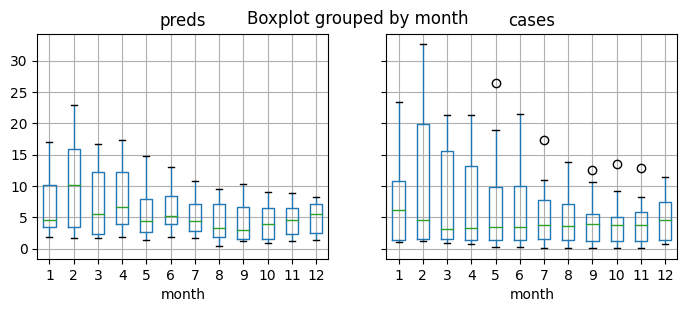

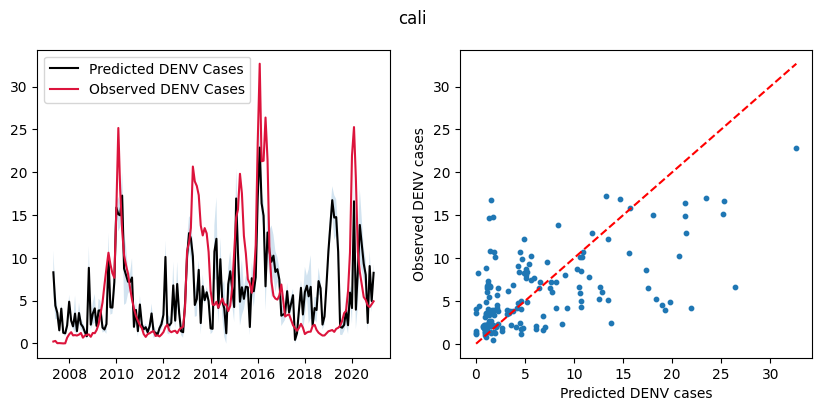

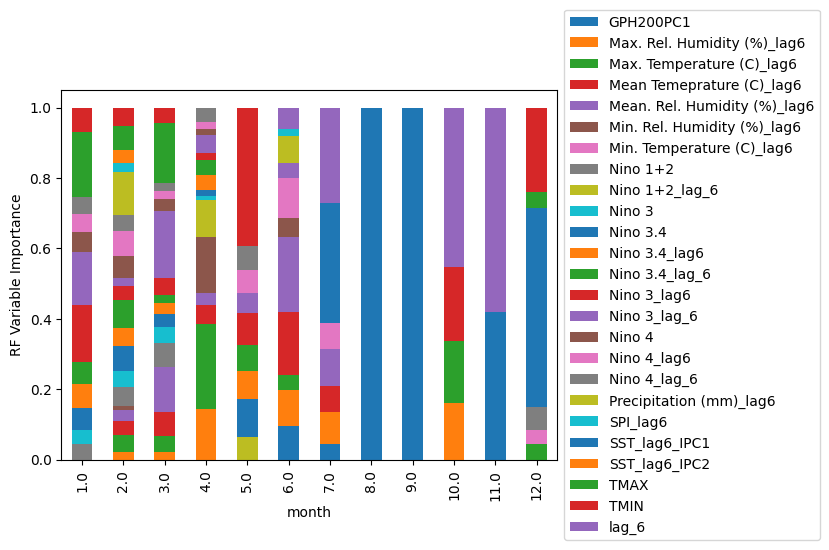

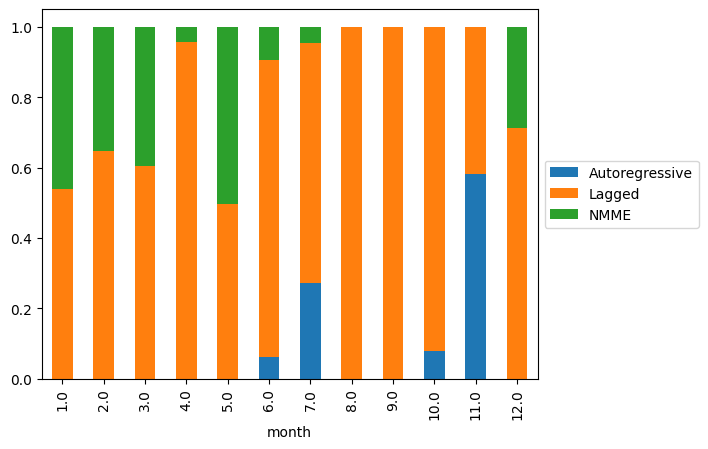

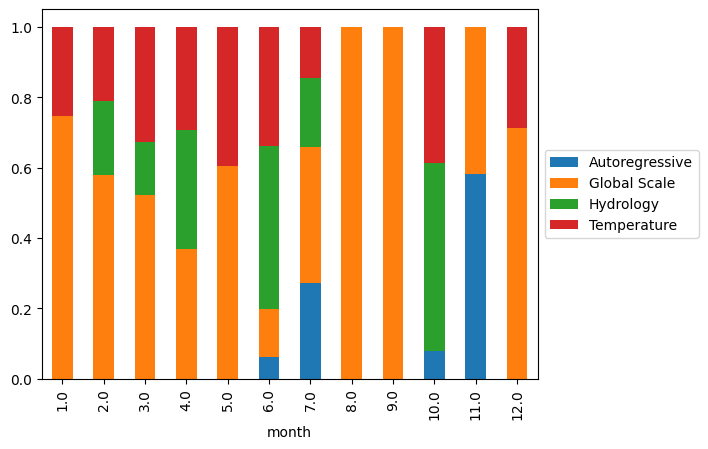

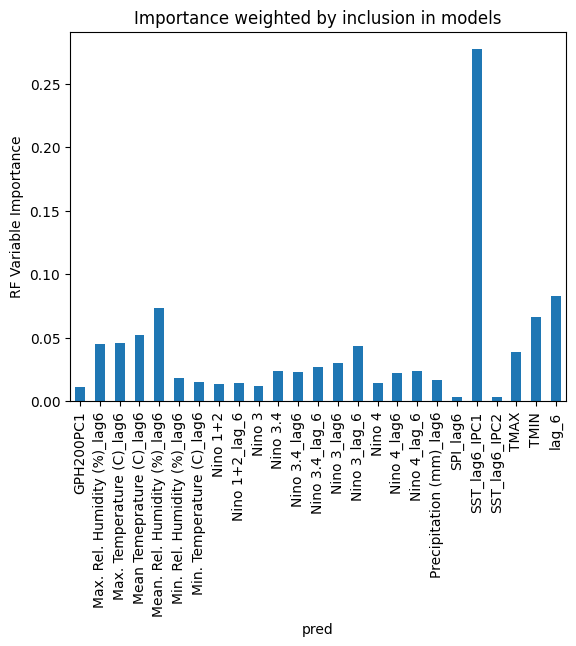

medellin 1.0
           0         1        variable      city  month
0   0.594446  0.053765       GPH200PC1  medellin    1.0
1   0.642023  0.033190        Nino 1+2  medellin    1.0
2   0.716507  0.013110   Nino 1+2_lag6  medellin    1.0
3   0.764763  0.006111  Nino 1+2_lag_6  medellin    1.0
4   0.603878  0.049134          Nino 3  medellin    1.0
5   0.540261  0.086214        Nino 3.4  medellin    1.0
6   0.666565  0.025101  Nino 3.4_lag_6  medellin    1.0
7   0.679022  0.021582     Nino 3_lag6  medellin    1.0
8   0.687046  0.019510    Nino 3_lag_6  medellin    1.0
9   0.475637  0.139221          Nino 4  medellin    1.0
10  0.542865  0.084415    Nino 4_lag_6  medellin    1.0
11  0.838643  0.001256   SST_lag6_IPC1  medellin    1.0
12  0.187466  0.580969   SST_lag6_IPC2  medellin    1.0
13 -0.156879  0.645048   SST_lag6_IPC3  medellin    1.0
14  0.641117  0.033520            TMAX  medellin    1.0
15  0.576271  0.063512            TMIN  medellin    1.0
16 -0.009975  0.976778           la

<ipython-input-42-2d1af02f15df>:139: RuntimeWarning: invalid value encountered in sqrt
  upper = np.concatenate((upper, yhat+np.sqrt(var)))
<ipython-input-42-2d1af02f15df>:144: RuntimeWarning: invalid value encountered in sqrt
  lower = np.concatenate((lower, yhat-np.sqrt(var)))
<ipython-input-42-2d1af02f15df>:148: RuntimeWarning: invalid value encountered in sqrt
  print(yhat+np.sqrt(var), yhat, yhat-np.sqrt(var))


[nan] [2.68726172] [nan]
[3.91562114] [2.3511595] [0.78669787]
[14.91482837] [10.34194681] [5.76906525]
[3.91561276] [2.90331315] [1.89101355]
[3.3822992] [2.35874967] [1.33520013]
[9.2411307] [6.51750985] [3.793889]
[2.77315217] [1.78767819] [0.80220421]
medellin 5.0
           0         1                     variable      city  month
0   0.160730  0.636850                    GPH200PC1  medellin    5.0
1  -0.922496  0.000053  Max. Rel. Humidity (%)_lag6  medellin    5.0
2   0.862404  0.000636    Min. Temperature (C)_lag6  medellin    5.0
3   0.142639  0.675670                     Nino 1+2  medellin    5.0
4   0.501301  0.116203               Nino 1+2_lag_6  medellin    5.0
5   0.413144  0.206609                       Nino 3  medellin    5.0
6   0.439395  0.176315                     Nino 3.4  medellin    5.0
7   0.675175  0.022629                Nino 3.4_lag6  medellin    5.0
8   0.666216  0.025205               Nino 3.4_lag_6  medellin    5.0
9   0.630577  0.037524                  N

[3.34193482] [2.65383156] [1.96572829]
[3.03274664] [2.3193522] [1.60595776]
[4.24221173] [3.30182457] [2.36143741]
[11.89807984] [9.21462327] [6.53116669]
[2.67982457] [2.3013376] [1.92285062]
[1.69124163] [1.11193374] [0.53262585]
[7.28263969] [5.93177152] [4.58090336]
[5.82055842] [4.79752637] [3.77449433]
medellin 10.0
           0         1                     variable      city  month
0  -0.439665  0.152666                    GPH200PC1  medellin   10.0
1  -0.653365  0.021222  Max. Rel. Humidity (%)_lag6  medellin   10.0
2   0.671657  0.016758    Max. Temperature (C)_lag6  medellin   10.0
3   0.622369  0.030679    Min. Temperature (C)_lag6  medellin   10.0
4  -0.346257  0.270223                     Nino 1+2  medellin   10.0
5   0.135090  0.675510               Nino 1+2_lag_6  medellin   10.0
6  -0.462757  0.129801                       Nino 3  medellin   10.0
7  -0.564724  0.055742                     Nino 3.4  medellin   10.0
8   0.662183  0.018974                Nino 3.4_lag6  m

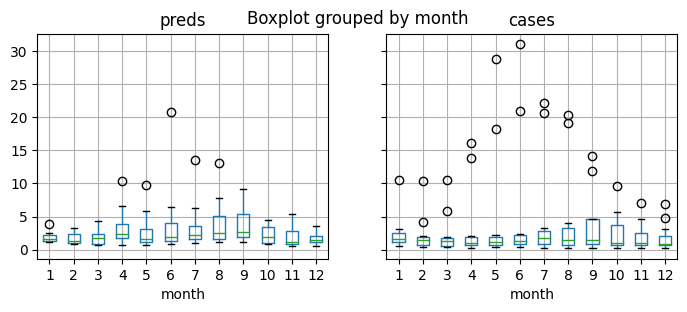

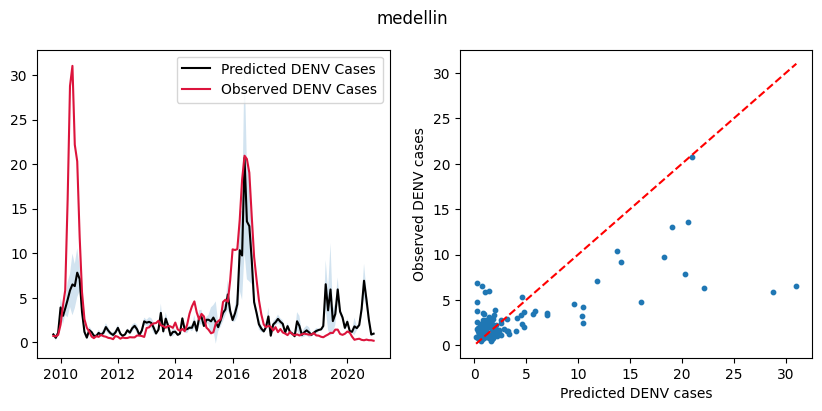

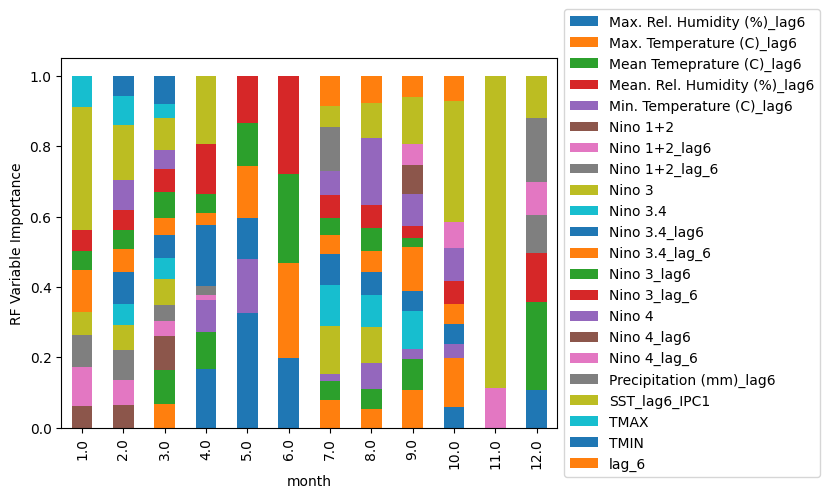

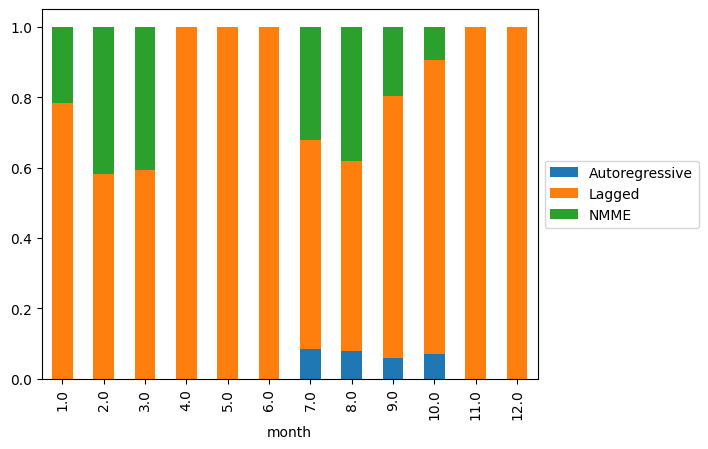

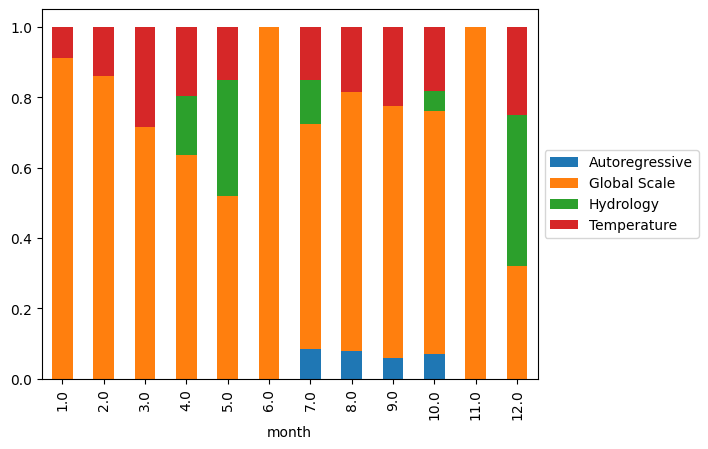

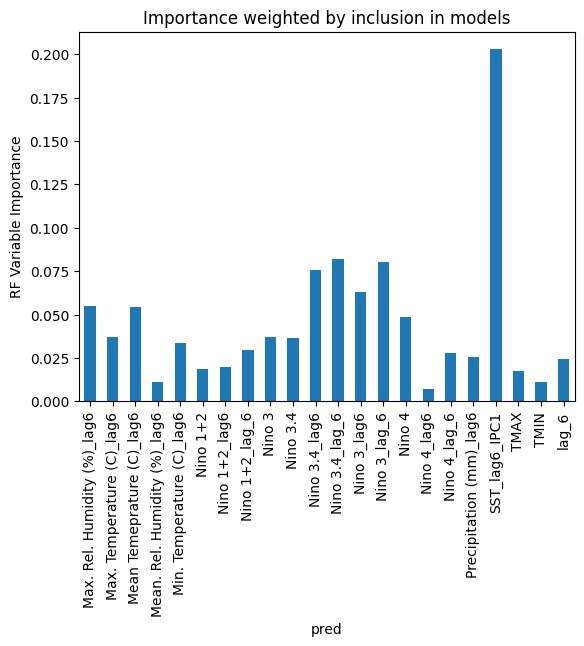

cucuta 1.0
           0         1        variable    city  month
0   0.353135  0.215528        Nino 1+2  cucuta    1.0
1  -0.099167  0.735901  Nino 1+2_lag_6  cucuta    1.0
2   0.433590  0.121414          Nino 3  cucuta    1.0
3   0.491898  0.074002        Nino 3.4  cucuta    1.0
4   0.131297  0.654579  Nino 3.4_lag_6  cucuta    1.0
5   0.124652  0.671141    Nino 3_lag_6  cucuta    1.0
6   0.515921  0.058961          Nino 4  cucuta    1.0
7   0.002270  0.993856    Nino 4_lag_6  cucuta    1.0
8  -0.192378  0.509959   SST_lag6_IPC1  cucuta    1.0
9  -0.272386  0.346121   SST_lag6_IPC2  cucuta    1.0
10  0.151350  0.605511            TMAX  cucuta    1.0
11 -0.291606  0.311743            TMIN  cucuta    1.0
12  0.290578  0.313530           lag_6  cucuta    1.0
N = 14
cucuta 2.0
           0         1        variable    city  month
0  -0.267805  0.354614       GPH200PC1  cucuta    2.0
1   0.155986  0.594374        Nino 1+2  cucuta    2.0
2  -0.047990  0.870586  Nino 1+2_lag_6  cucuta    2.0

[12.30981849] [9.55986233] [6.80990617]
[12.21666797] [10.1063371] [7.99600624]
[5.57568] [4.74799338] [3.92030675]
[8.47934771] [6.89191548] [5.30448324]
[9.60365919] [7.39180676] [5.17995432]
[3.22247025] [2.4417978] [1.66112536]
[12.11774122] [10.85561312] [9.59348503]
[11.38171251] [9.99172446] [8.60173641]
[10.24644409] [7.56315075] [4.87985741]
[8.70577675] [7.52624277] [6.3467088]
[5.54525795] [4.47034917] [3.39544038]
[3.40117806] [2.4137854] [1.42639273]
[14.01683097] [12.61554305] [11.21425513]
[4.77573552] [3.94292138] [3.11010723]
cucuta 8.0
           0         1        variable    city  month
0  -0.319709  0.265160       GPH200PC1  cucuta    8.0
1  -0.074690  0.799678        Nino 1+2  cucuta    8.0
2  -0.609364  0.020704   Nino 1+2_lag6  cucuta    8.0
3  -0.550619  0.041305  Nino 1+2_lag_6  cucuta    8.0
4   0.078175  0.790517          Nino 3  cucuta    8.0
5   0.182708  0.531844        Nino 3.4  cucuta    8.0
6  -0.296671  0.303022  Nino 3.4_lag_6  cucuta    8.0
7  -0.36

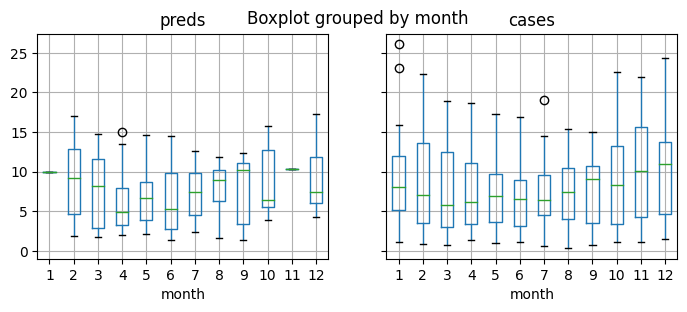

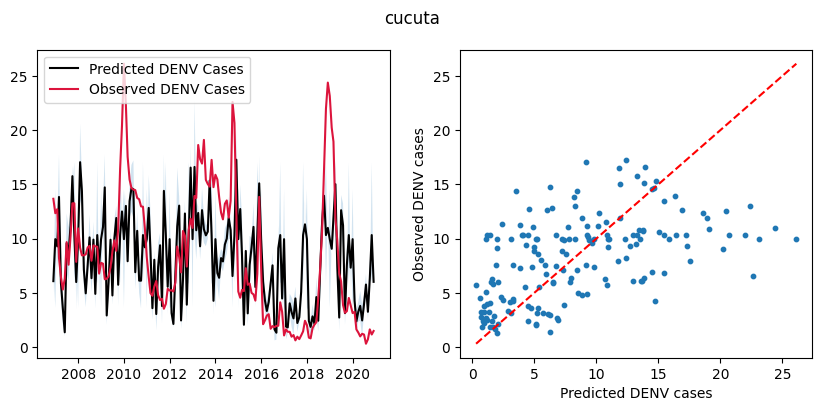

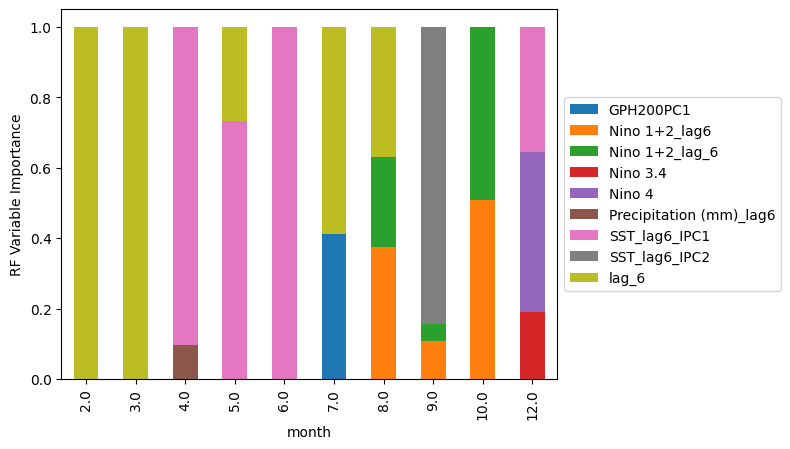

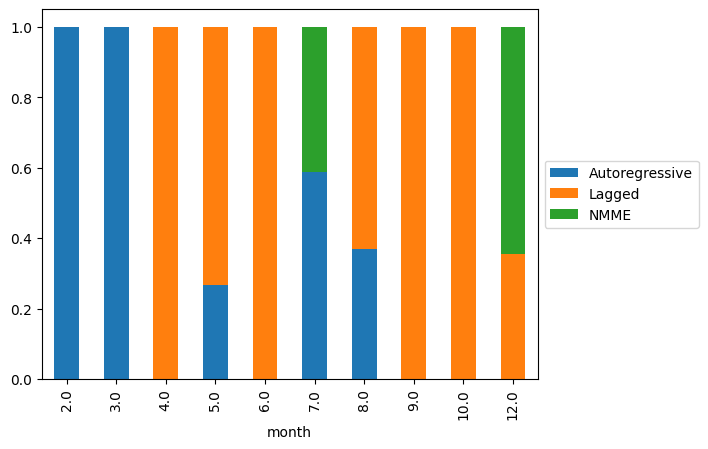

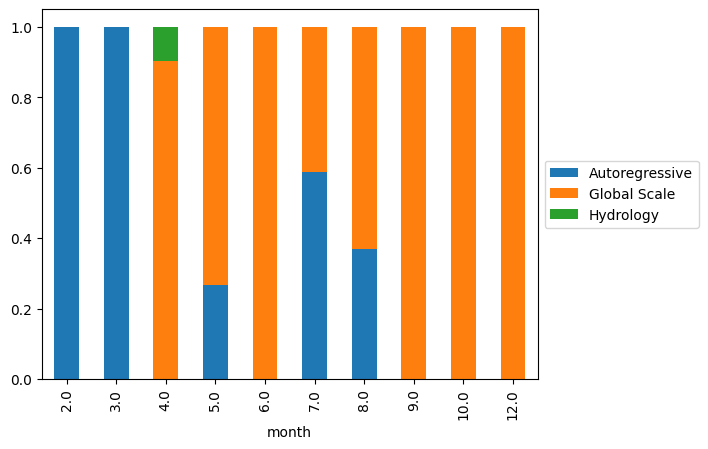

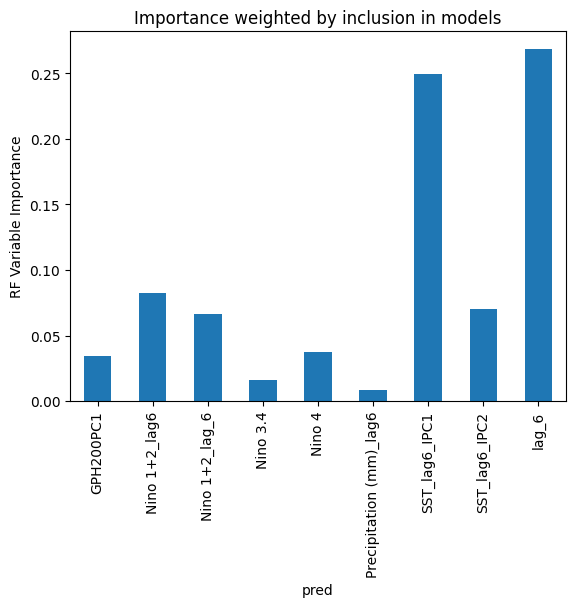

leticia 1.0
           0         1                      variable     city  month
0   0.222831  0.486347                     GPH200PC1  leticia    1.0
1  -0.666677  0.017898     Mean Temeprature (C)_lag6  leticia    1.0
2   0.693590  0.012363  Mean. Rel. Humidity (%)_lag6  leticia    1.0
3   0.115025  0.721864                      Nino 1+2  leticia    1.0
4  -0.089074  0.783098                Nino 1+2_lag_6  leticia    1.0
5   0.160307  0.618702                        Nino 3  leticia    1.0
6   0.185858  0.563037                      Nino 3.4  leticia    1.0
7   0.213322  0.505604                Nino 3.4_lag_6  leticia    1.0
8   0.106650  0.741480                  Nino 3_lag_6  leticia    1.0
9   0.256406  0.421142                        Nino 4  leticia    1.0
10  0.440617  0.151675                  Nino 4_lag_6  leticia    1.0
11  0.473907  0.119609                 SST_lag6_IPC1  leticia    1.0
12 -0.548243  0.064955                 SST_lag6_IPC2  leticia    1.0
13  0.209092  0.514278

[28.97900934] [19.31563572] [9.65226211]
[13.13784249] [10.70101848] [8.26419447]
[1.79620917] [1.06313397] [0.33005877]
[26.27296204] [18.29346861] [10.31397519]
[4.53667959] [4.09086677] [3.64505396]
[19.62979256] [13.60520595] [7.58061935]
[5.09720452] [2.61842693] [0.13964934]
[9.10508947] [4.69432748] [0.28356549]
[8.25773184] [6.26904448] [4.28035712]
[8.09729818] [5.99255968] [3.88782117]
[16.26936818] [9.11739729] [1.96542641]
[64.78476191] [50.83165973] [36.87855755]
leticia 8.0
           0         1        variable     city  month
0  -0.257336  0.396003       GPH200PC1  leticia    8.0
1   0.392644  0.184472       GPH200PC2  leticia    8.0
2   0.285554  0.344284        Nino 1+2  leticia    8.0
3   0.055401  0.857341  Nino 1+2_lag_6  leticia    8.0
4   0.317166  0.291010          Nino 3  leticia    8.0
5   0.214106  0.482431        Nino 3.4  leticia    8.0
6   0.010623  0.972523  Nino 3.4_lag_6  leticia    8.0
7   0.018585  0.951947    Nino 3_lag_6  leticia    8.0
8   0.164859

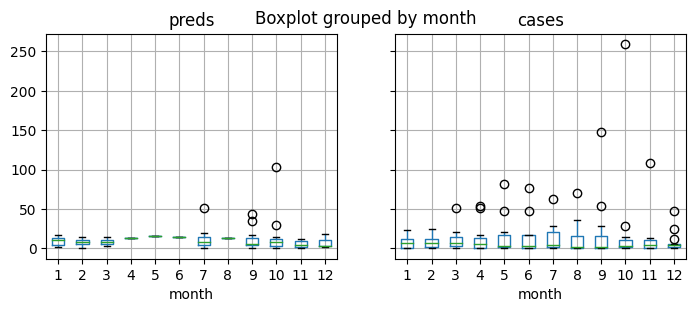

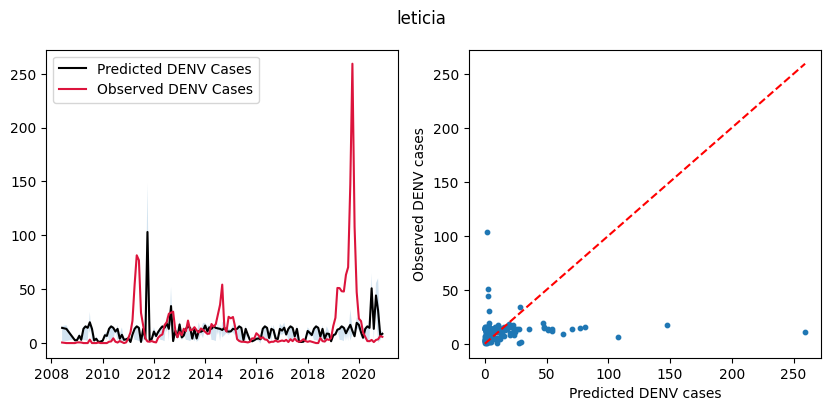

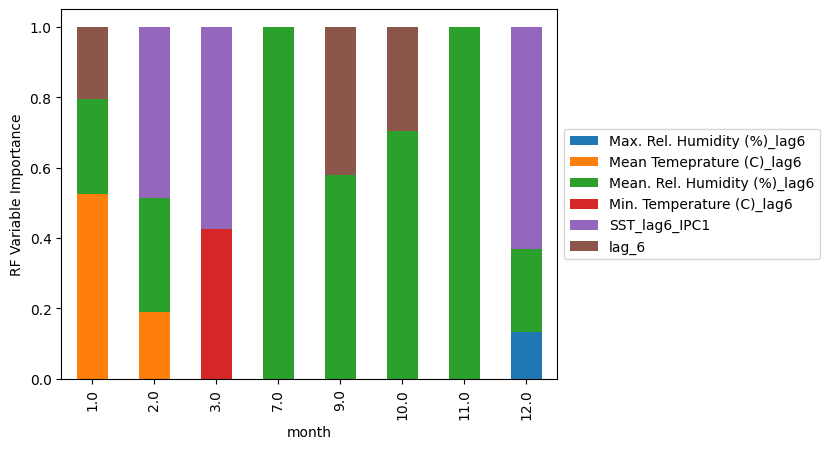

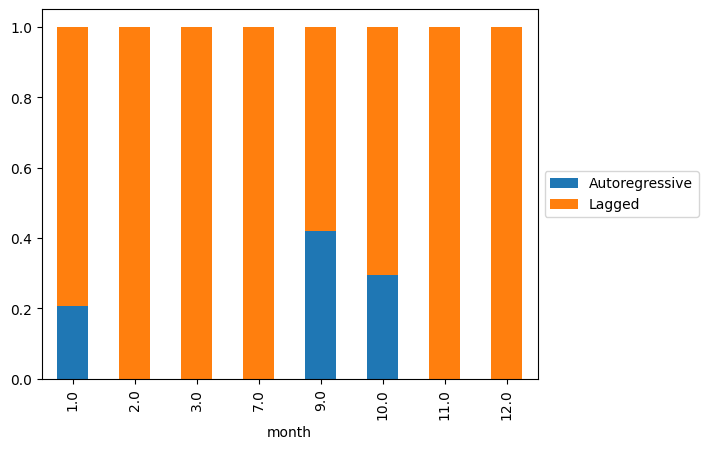

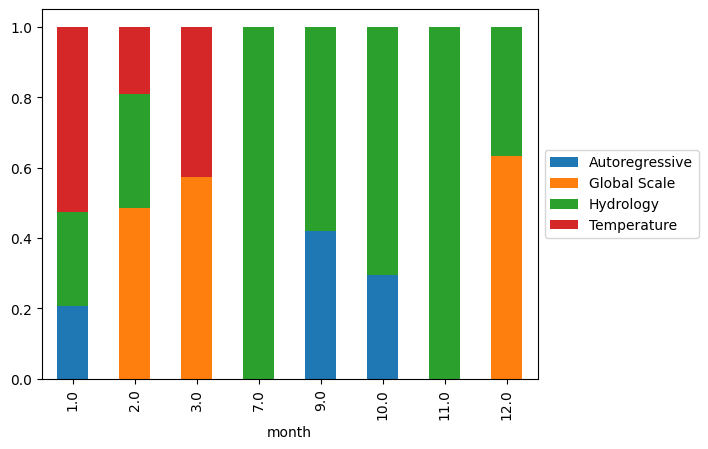

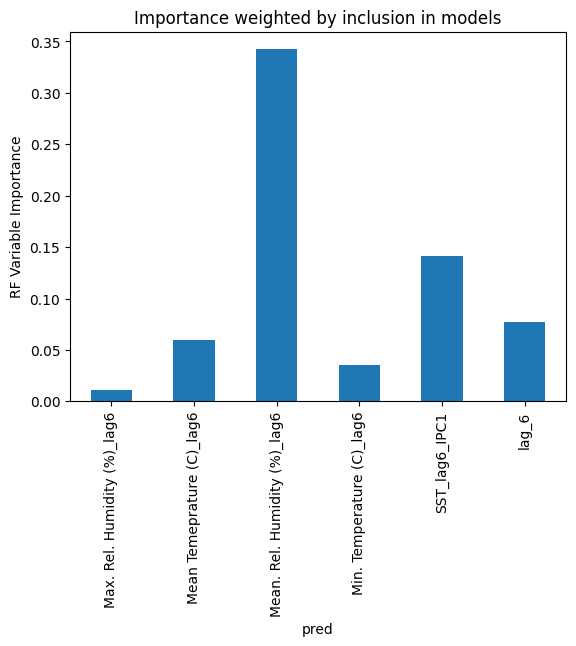

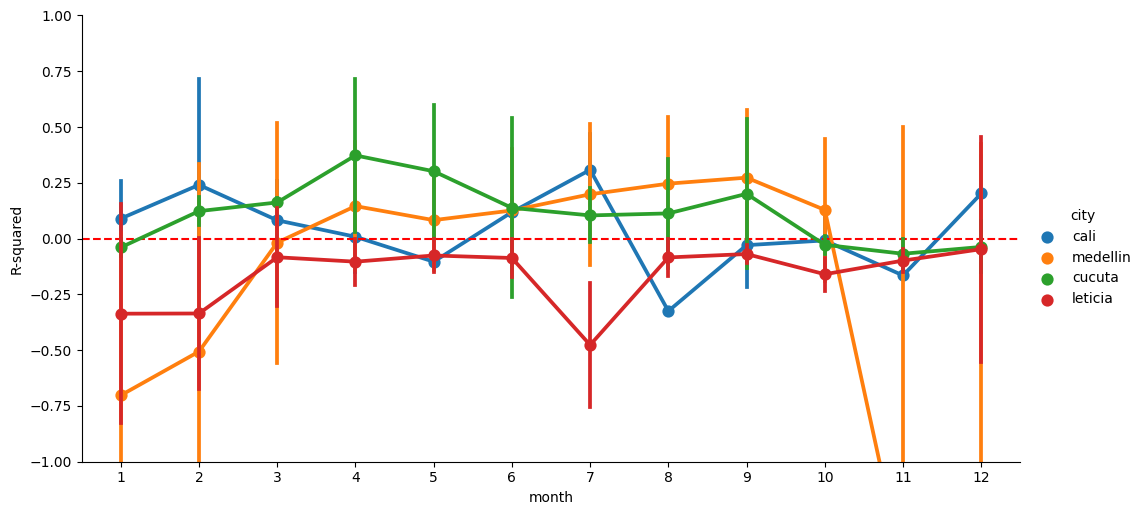

In [43]:
from sklearn.preprocessing import scale
from VBDFunctions import r2, subset_data


comp=[]
allModels=[]
importance = []
sourceImp =[]
vartypeImp=[]
errorList=[]
cors =[]

model_type="Random Forest"
#model_type="PCR"

for city in ['cali','medellin','cucuta','leticia']:
   
    df, ar_comp, vi, errors, ctbl = build_model(city, pred_df=pred_df,ar_results=ar_results)
    allModels.append(df)
    cors.append(ctbl)
    
    #KS test
    errorList.append(errors)
    el=np.concatenate(errorList)

    fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
    df.boxplot('preds',by='month',ax=ax1)
    df.boxplot('cases',by='month',ax=ax2)
    plt.show()

    df=df.set_index('date')
    df=df.sort_values('date')
    #Timeseries
    fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False, figsize=(10, 4))
    ax1.plot(df['preds'],c='black',label='Predicted DENV Cases')
    ax1.fill_between(df.index,df['ap25'],df['ap75'], alpha=0.2)
    ax1.plot(df['cases'],c='crimson',label="Observed DENV Cases")
    ax1.legend()
    plt.ylabel("")
    #1:1 plot
    ax2.scatter(df['cases'],df['preds'],s=10)
    min_val = min(min(df['cases']), min(df['preds']))
    max_val = max(max(df['cases']), max(df['preds']))
    ax2.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='1:1 Line')
    ax2.set_ylabel('Observed DENV cases')
    ax2.set_xlabel('Predicted DENV cases')
    plt.suptitle(city)
    plt.show()
    
    if model_type=='Random Forest':
        #Importance
        vi.plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) 
        plt.ylabel('RF Variable Importance')
        plt.show()

        #Bin by source and variable type     
        source=vi.reset_index().melt(id_vars=['month'])
        for k, v in PredictorSourceDict.items():
             source['pred'].replace(v, k, inplace=True)
        
        vartype=vi.reset_index().melt(id_vars=['month'])
        for k, v in PredictorTypeSourceDict.items():
             vartype['pred'].replace(v, k, inplace=True)
                
                

        source=source.pivot_table(index='month',columns='pred',values='value',aggfunc='sum')
        source.plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) 
        plt.show()
        
        vartype=vartype.pivot_table(index='month',columns='pred',values='value',aggfunc='sum')
        vartype.plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) 
        plt.show()
        
        WeightedImportance=vi.mean()*vi.count()/12
        WeightedImportance.plot.bar(stacked=True)
        plt.ylabel('RF Variable Importance')
        plt.title('Importance weighted by inclusion in models')
        plt.show()
        
        vi['city'] = city
        importance.append(vi)
        
        source['city']=city
        sourceImp.append(source)
        
        vartype['city']=city
        vartypeImp.append(vartype)
        
    model_comp = pd.merge(df,ar_comp.drop(['city','cases'],axis=1),on=['month','year'])
    model = []
    ar = []
    for month in range(1,13):
        sub = subset_data(model_comp,city,month)
        model.append(r2(sub['cases'],sub['preds']))
        ar.append(r2(sub['cases'],sub['ARpredictions']))


    comparison = pd.DataFrame({'Climate Model + AR':model,'AR':ar,'month':range(1,13),'city':city})
    comparison = pd.melt(comparison, id_vars = ['month','city'])
    comp.append(comparison)

    
comparison = pd.concat(comp)  
sns.catplot(x = 'month', y='value', 
               hue = 'city',data=comparison, kind='point', height=5, aspect=2)
plt.axhline(y = 0,    # Line on y = 0.2
           xmin = 0, # From the left
           xmax = 12,color='red',linestyle='--') # To the right
plt.ylabel('R-squared')
plt.ylim(-1,1)
plt.show()

allM=pd.concat(allModels)

In [34]:
c = pd.concat([pd.concat(cors[0]),pd.concat(cors[1]),pd.concat(cors[2]),pd.concat(cors[3])])
print(c[(c['variable']=='lag_1') & (c['city']=='cali') & (c['month']==1) | 
  (c['variable']=='lag_1') & (c['city']=='cali') & (c['month']==7)])

print(c[(c['variable']=='lag_1') & (c['city']=='leticia') & (c['month']==1) | 
  (c['variable']=='lag_1') & (c['city']=='leticia') & (c['month']==12)])

print(c[(c['variable']=='lag_1') & (c['city']=='medellin') & (c['month']==9) | 
  (c['variable']=='lag_1') & (c['city']=='medellin') & (c['month']==10)])

print(c[(c['variable']=='lag_1')][0].mean())



print(c[ (c['city']=='cali') & (c['month']==1) | (c['city']=='cali') & (c['month']==7)])

print(c[(c['city']=='leticia') & (c['month']==1) |(c['city']=='leticia') & (c['month']==12)])

print(c[(c['city']=='medellin') & (c['month']==9) |(c['city']=='medellin') & (c['month']==10)])

c[(c['variable']=='lag_1')][0].mean()

Empty DataFrame
Columns: [0, 1, variable, city, month]
Index: []
Empty DataFrame
Columns: [0, 1, variable, city, month]
Index: []
Empty DataFrame
Columns: [0, 1, variable, city, month]
Index: []
nan
           0         1                      variable  city  month
0  -0.169519  0.579814                     GPH200PC1  cali    1.0
1  -0.771139  0.002026   Max. Rel. Humidity (%)_lag3  cali    1.0
2   0.674795  0.011397     Max. Temperature (C)_lag3  cali    1.0
3   0.780534  0.001641     Mean Temeprature (C)_lag3  cali    1.0
4  -0.730306  0.004586  Mean. Rel. Humidity (%)_lag3  cali    1.0
5  -0.589226  0.034085   Min. Rel. Humidity (%)_lag3  cali    1.0
6   0.812452  0.000738     Min. Temperature (C)_lag3  cali    1.0
7   0.667573  0.012660                      Nino 1+2  cali    1.0
8   0.552144  0.050401                Nino 1+2_lag_3  cali    1.0
9   0.676019  0.011193                        Nino 3  cali    1.0
10  0.679193  0.010676                      Nino 3.4  cali    1.0
11  0.751

nan

In [59]:
#allM.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_3mo.csv')

In [12]:
import datetime
import pandas as pd
allM = pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelResults_1mo.csv')
#allM['date']=pd.to_datetime(dict(year=allM.year, month=allM.month, day=1))
#allM.ap25[allM.ap25<0] = 0
allM.groupby(['city','month','Mtype']).count()


Unnamed: 0  year  preds  ap75  ap25  date  cases
city     month Mtype                                                          
cali     1     Random Forest          12    12     12    12    12    12     12
         2     Random Forest          14    14     14    13    13    14     14
         3     Random Forest          14    14     14    14    14    14     14
         4     Random Forest          14    14     14    13    13    14     14
         5     Random Forest          14    14     14    14    14    14     14
         6     Random Forest          14    14     14    14    14    14     14
         7     Random Forest          14    14     14    14    14    14     14
         8     Random Forest          14    14     14    14    14    14     14
         9     Random Forest          14    14     14    14    14    14     14
         10    Random Forest          14    14     14    14    14    14     14
         11    Random Forest          14    14     14    14    14    14     14
         12    Random Forest          15    15     15    15    15    15     15
cucuta   1     Random Forest          14    14     14    14    14    14     14
         2     Random Forest          14    14     14    14    14    14     14
         3     Random Forest          14    14     14    14    14    14     14
         4     Random Forest          14    14     14    14    14    14     14
         5     Random Forest          14    14     14    14    14    14     14
         6     Random Forest          14    14     14    14    14    14     14
         7     Random Forest          14    14     14    14    14    14     14
         8     Random Forest          14    14     14    14    14    14     14
         9     Random Forest          14    14     14    14    14    14     14
         10    Random Forest          14    14     14    14    14    14     14
         11    Random Forest          14    14     14    14    14    14     14
         12    Random Forest          15    15     15    15    15    15     15
leticia  1     Random Forest          12    12     12    12    12    12     12
         2     Random Forest          12    12     12    12    12    12     12
         3     Random Forest          12    12     12    12    12    12     12
         4     Random Forest          12    12     12    12    12    12     12
         5     Random Forest          12    12     12    12    12    12     12
         6     Random Forest          13    13     13    13    13    13     13
         7     Random Forest          13    13     13    13    13    13     13
         8     Random Forest          13    13     13    13    13    13     13
         9     Random Forest          13    13     13    13    13    13     13
         10    Random Forest          13    13     13    13    13    13     13
         11    Random Forest          13    13     13    13    13    13     13
         12    Random Forest          13    13     13    13    13    13     13
medellin 1     Random Forest          11    11     11    11    11    11     11
         2     Random Forest          11    11     11    11    11    11     11
         3     Random Forest          11    11     11    11    11    11     11
         4     Random Forest          11    11     11    10    10    11     11
         5     Random Forest          12    12     12    12    12    12     12
         6     Random Forest          12    12     12    12    12    12     12
         7     Random Forest          12    12     12    12    12    12     12
         8     Random Forest          12    12     12    12    12    12     12
         9     Random Forest          12    12     12    12    12    12     12
         10    Random Forest          12    12     12    12    12    12     12
         11    Random Forest          12    12     12    12    12    12     12
         12    Random Forest          12    12     12    12    12    12     12

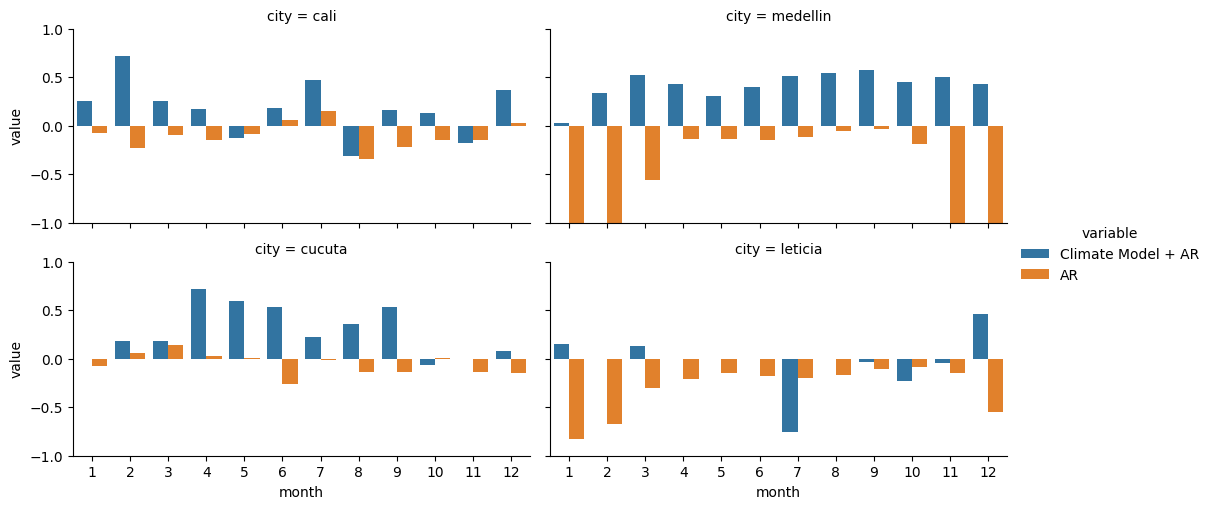

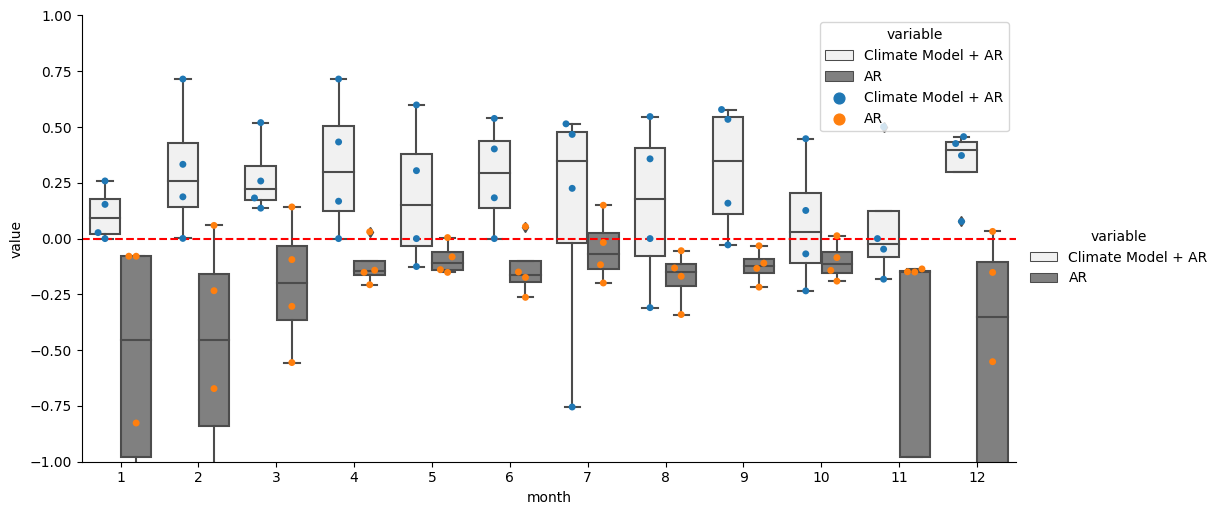

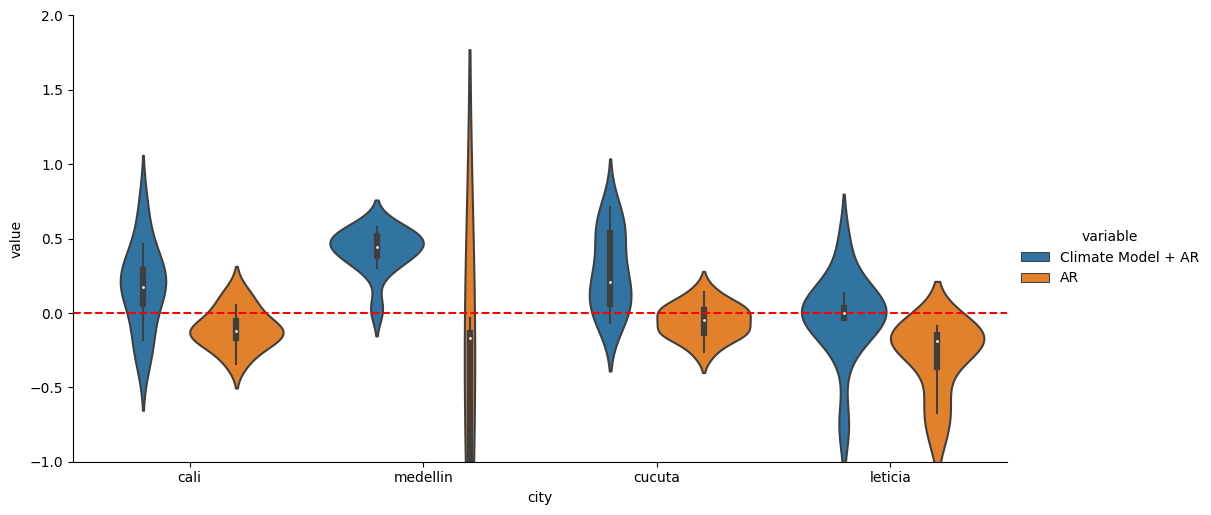

In [44]:

sns.catplot(col = 'city', y='value', x = 'month',hue='variable',
            data=comparison, kind='bar', height=2.5, aspect=2,col_wrap=2)
plt.ylim(-1,1)
plt.show()

sns.catplot(x = 'month', y='value', hue = 'variable' ,data=comparison, kind='box', height=5, aspect=2,color='0.5')
sns.swarmplot(x = 'month', y='value', hue = 'variable' ,data=comparison,dodge=True)
plt.axhline(y = 0, xmin = 0, xmax = 12,color='red',linestyle='--') # To the right
plt.ylim(-1,1)
plt.show()


sns.catplot(x = 'city', y='value', hue = 'variable' ,data=comparison, kind='violin', height=5, aspect=2)
plt.axhline(y = 0, xmin = 0, xmax = 12,color='red',linestyle='--') # To the right
plt.ylim(-1,2)
plt.show()


comparison.groupby(['city','variable']).value.mean()
comparison.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_6mo.csv')



Comparing Importance and Case numbers

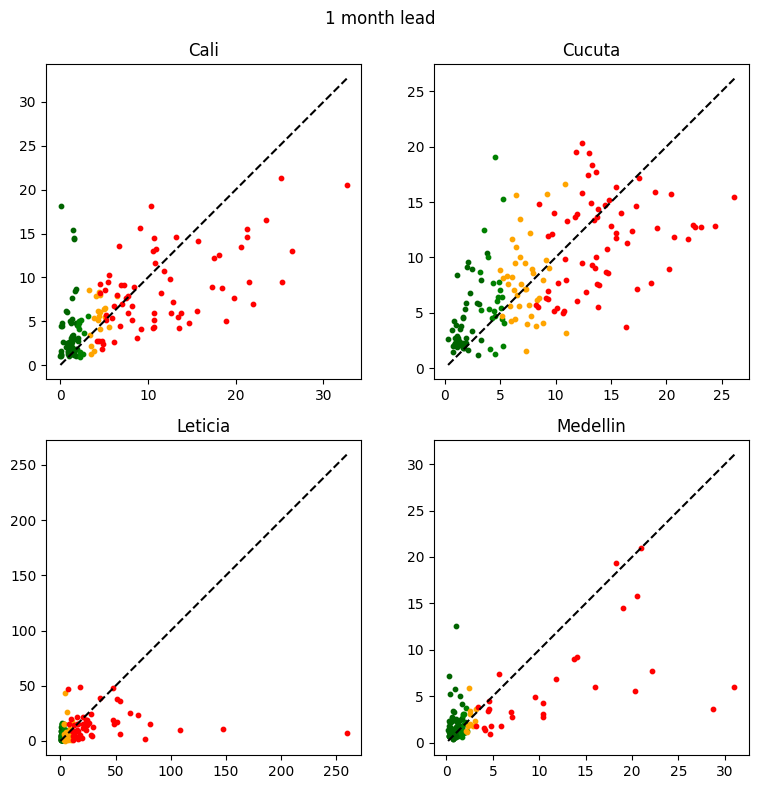

In [36]:
import matplotlib.pyplot as plt
from VBDFunctions import endemic_channel #From Mauricio epiCo
ModelResultsEC=[]

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
ax=ax.ravel()
for i, city in enumerate(cities.name):
    hold=allM[allM.city==city]
    eclist=[]
    for j in np.linspace(1,12,12):
        ec = endemic_channel(pdt,city,outliers=0.9,plots=False)
        ec['month']=np.linspace(1,12,12)
        holdec=ec[ec.month==j]
        bin_edges=[0]+holdec.lower.tolist()+holdec.central.tolist()+holdec.upper.tolist()+[np.inf]
        bin_labels = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']
        channel=pd.cut(hold[hold.month==j].cases,bins=bin_edges,labels=bin_labels)
        Pchannel=pd.cut(hold[hold.month==j].preds,bins=bin_edges,labels=bin_labels)
        
        channelHold=pd.DataFrame({'year':hold[hold.month==j].year.tolist(),'month':hold[hold.month==j].month.tolist(),
                                'city':hold[hold.month==j].city.tolist(),'channel':channel,'Pchannel':Pchannel})
        eclist.append(channelHold)
    
    ec=pd.concat(eclist)
    hold=pd.merge(hold,ec)
    ModelResultsEC.append(hold)
    
    colors = {'Below Safety': 'darkgreen', 'Above Safety': 'green', 'Warning': 'orange', 'Epidemic': 'red'}  # Add more colors as needed

    
    
    # Create scatterplot
    for category, color in colors.items():
        ax[i].scatter(hold[hold['channel'] == category]['cases'], 
                    hold[hold['channel'] == category]['preds'], 
                    color=color, 
                    label=category,s=10)
    
    #ax[i].scatter(hold.cases,hold.preds,s=10)
    min_val = min(min(hold['cases']), min(hold['preds']))
    max_val = max(max(hold['cases']), max(hold['preds']))
    ax[i].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='1:1 Line')
    ax[i].set_aspect('equal')
    ax[i].set_title(city.title())
fig.suptitle('1 month lead')
fig.tight_layout()


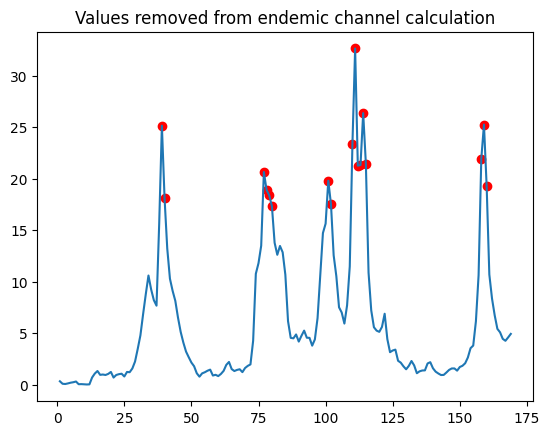

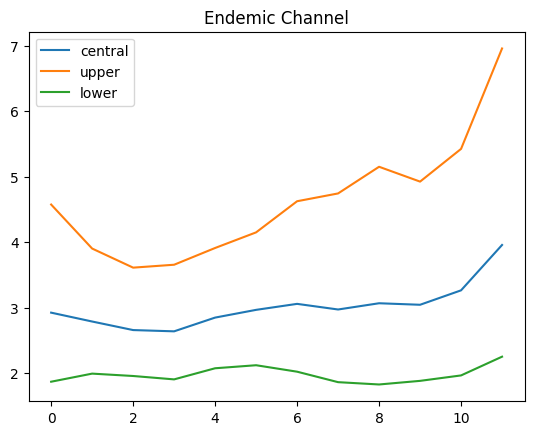

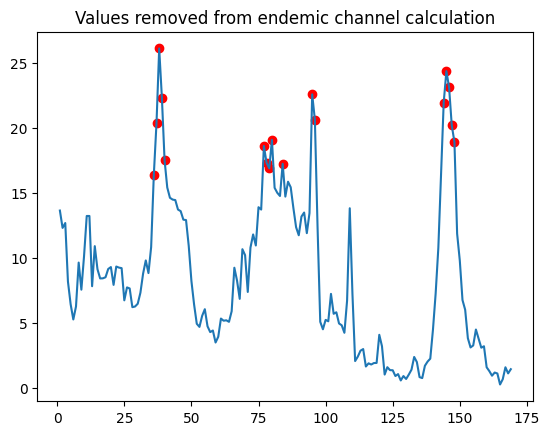

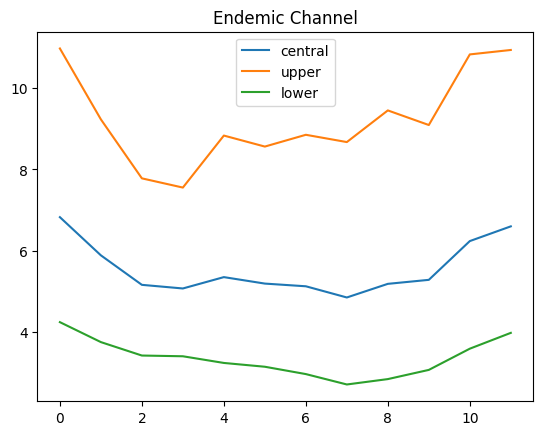

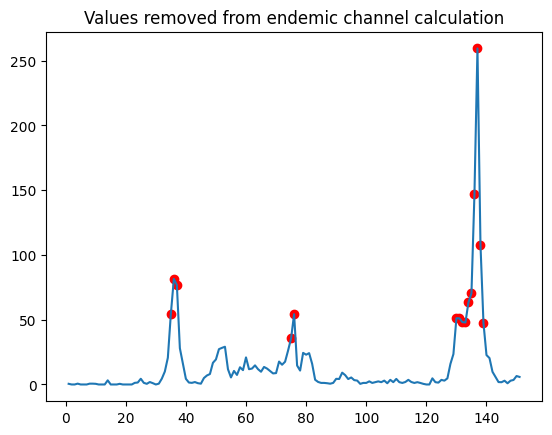

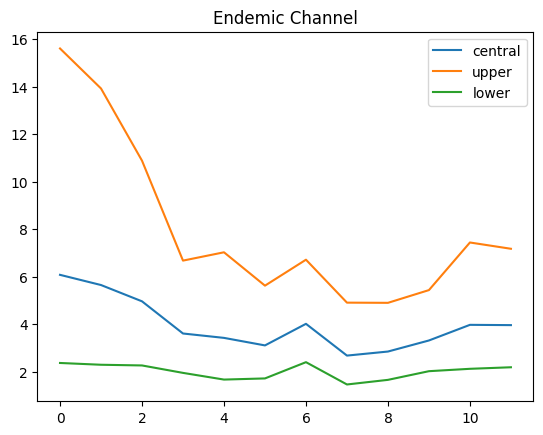

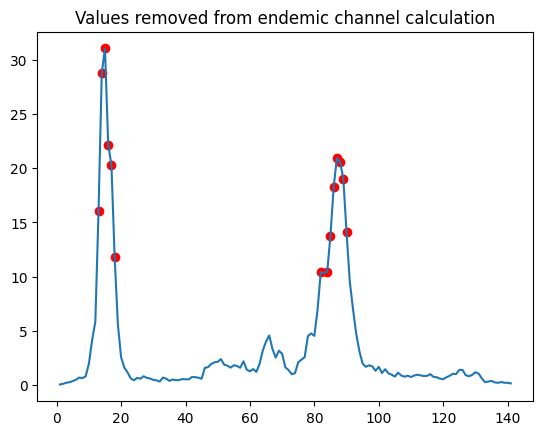

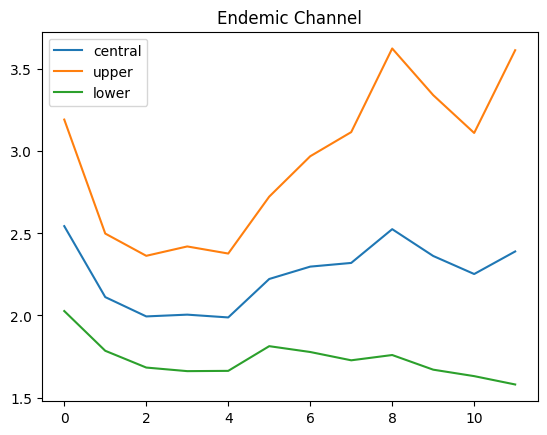

In [37]:
allec=[]
for i, city in enumerate(cities.name):
    ec = endemic_channel(pdt,city,outliers=0.9,plots=True)
    ec['month']=np.linspace(1,12,12)
    ec['city']=city
    allec.append(ec)
allec=pd.concat(allec)

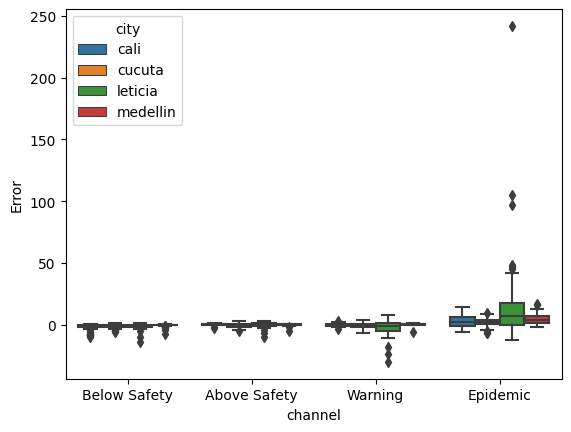

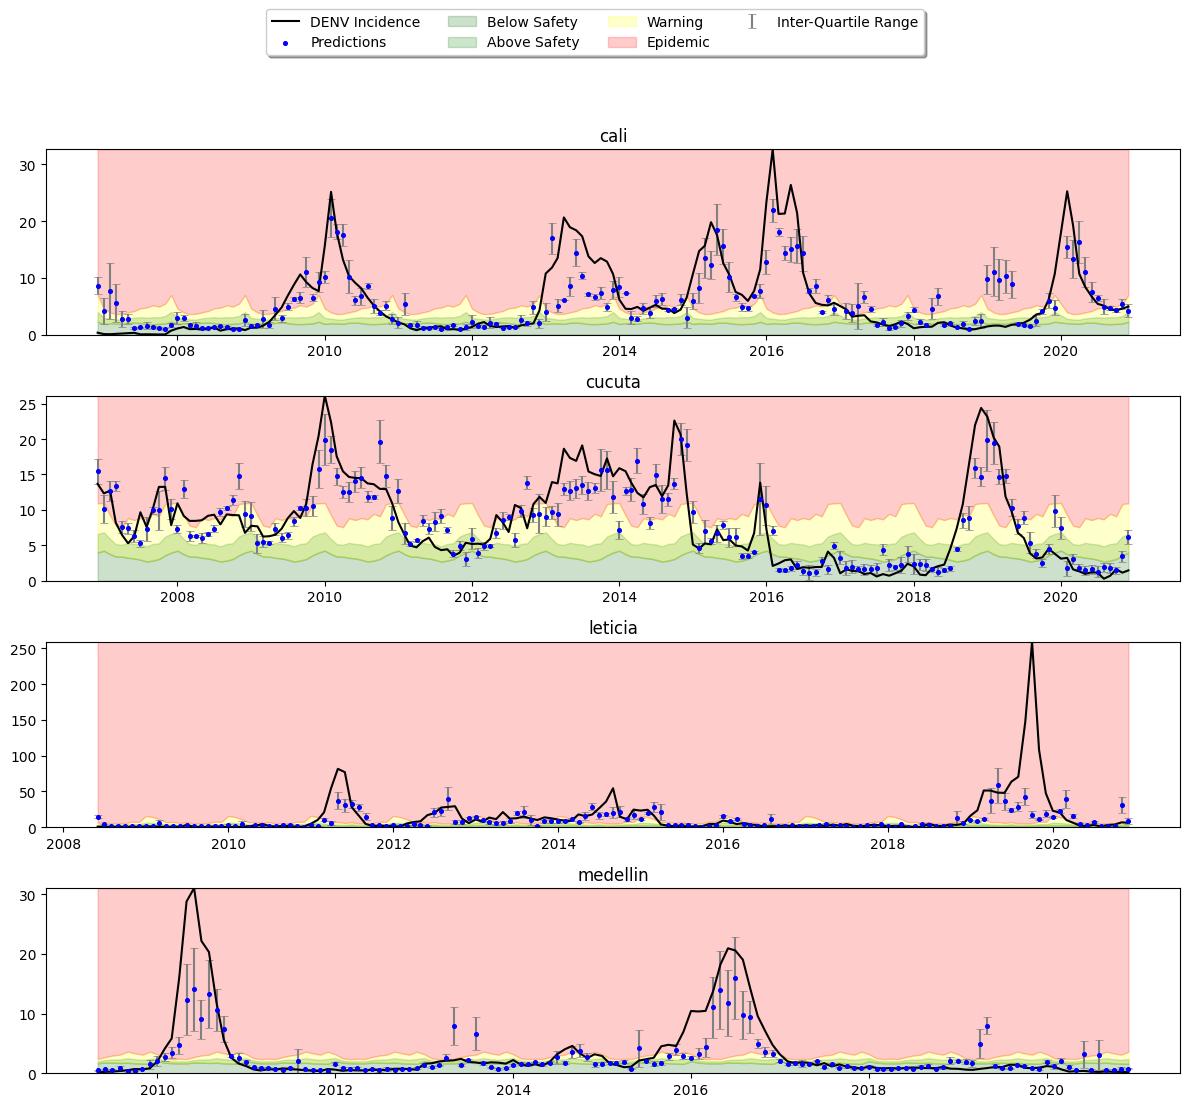

In [27]:
dfEC=pd.concat(ModelResultsEC)

dfEC['Error']=dfEC.cases - dfEC.preds

sns.boxplot(x='channel',y='Error',hue='city',data=dfEC)
plt.show()

dfEC=pd.merge(dfEC,allec)
dfEC['Lerr']=dfEC.preds-dfEC.ap25
dfEC['Uerr']=dfEC.ap75-dfEC.preds

dfEC['Lerr'] = dfEC['Lerr'].apply(lambda x: max(0, x))
dfEC['Uerr'] = dfEC['Uerr'].apply(lambda x: max(0, x))


fig, ax=plt.subplots(nrows=4,ncols=1,figsize=(12,10))
ax=ax.ravel()
for i, city in enumerate(cities.name):
    hold=dfEC[dfEC.city==city]
    hold=hold.sort_values(by=['year','month'])
    
    hold['ulim'] = np.max(hold.cases)
    hold['llim'] = 0
    
    ax[i].plot(hold.date,hold.cases, color='black',zorder=2,label='DENV Incidence')
    ax[i].scatter(hold.date,hold.preds, marker='o', color='blue', label='Predictions',s=7,zorder=2)
    ax[i].errorbar(hold.date, hold.preds, yerr=[hold.Lerr, hold.Uerr], fmt='none', ecolor='gray', capsize=3, capthick=0.5, label='Inter-Quartile Range',zorder=1)
    ax[i].fill_between(hold.date, hold.llim, hold.lower, color='darkgreen', alpha=0.2, label='Below Safety',zorder=0)
    ax[i].fill_between(hold.date, hold.lower, hold.central, color='green', alpha=0.2, label='Above Safety',zorder=0)
    ax[i].fill_between(hold.date, hold.lower, hold.upper, color='yellow', alpha=0.2, label='Warning',zorder=0)
    ax[i].fill_between(hold.date, hold.upper, hold.ulim, color='red', alpha=0.2, label='Epidemic',zorder=0)
    ax[i].set_ylim(0,np.max(hold.cases))
    ax[i].set_title(city)
handles, labels = ax[i].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=4, fancybox=True, shadow=True)
fig.tight_layout()
plt.show()





In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate accuracy
channel = dfEC.channel.astype(str)
Pchannel = dfEC.Pchannel.astype(str)
accuracy = accuracy_score(channel, Pchannel)

metrics=[]

sensitivity=[]
specificity=[]
categories = ['Below Safety', 'Above Safety', 'Warning', 'Epidemic']

for c in categories:
    obs,preds = channel == c, Pchannel==c
    conf_matrix = confusion_matrix(obs, preds)
    # Extract true positives, true negatives, false positives, and false negatives
    TP = conf_matrix[1, 1]  # True Positives
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives

    # Calculate sensitivity and specificity
    sen = TP / (TP + FN)
    spe = TN / (TN + FP)

    sensitivity.append(sen)
    specificity.append(spe)
    

d={'categories':categories,'sensitivity':sensitivity,'specificity':specificity}
metrics.append(pd.DataFrame(d))


In [47]:
hits = (dfEC.lower<dfEC.preds)&(dfEC.preds<dfEC.upper)

def category_hit(df,channel):
    df=df[df.channel==channel]
    if channel=="Below Safety":
        hits=np.sum(df.preds<df.lower)
        
    if channel=="Above Safety":
        hits=np.sum((df.lower<df.preds)&(df.preds<df.central))
        
    if channel=="Warning":
        hits=np.sum((df.central>df.preds)&(df.preds<df.upper))
    
    if channel=="Epidemic":
        hits=np.sum(df.preds>df.upper)
   
    n=np.sum(df.channel==channel)
        
        
    accuracy=(hits/n)*100
    return accuracy

store=[]
cit=[]
cat=[]
for city in cities.name:
    hdf=dfEC[dfEC.city==city]
    for category in ['Below Safety',"Above Safety","Warning","Epidemic"]:
        print("Accuracy, "+category+":",round(category_hit(hdf,channel=category),2),"%")
        
        #print(category_metrics(hdf,channel=category))
        
        store.append(category_hit(hdf,channel=category))
        cit.append(city)
        cat.append(category)
        
        


d={'city':cit,'Accuracy':store,'Category':cat}
pd.DataFrame(d)

Accuracy, Below Safety: 6.52 %
Accuracy, Above Safety: 28.57 %
Accuracy, Warning: 21.05 %
Accuracy, Epidemic: 72.58 %
Accuracy, Below Safety: 34.15 %
Accuracy, Above Safety: 12.5 %
Accuracy, Warning: 22.73 %
Accuracy, Epidemic: 52.0 %
Accuracy, Below Safety: 0.0 %
Accuracy, Above Safety: 5.88 %
Accuracy, Warning: 21.05 %
Accuracy, Epidemic: 57.14 %
Accuracy, Below Safety: 56.25 %
Accuracy, Above Safety: 0.0 %
Accuracy, Warning: 50.0 %
Accuracy, Epidemic: 12.5 %


city   Accuracy      Category
0       cali   6.521739  Below Safety
1       cali  28.571429  Above Safety
2       cali  21.052632       Warning
3       cali  72.580645      Epidemic
4     cucuta  34.146341  Below Safety
5     cucuta  12.500000  Above Safety
6     cucuta  22.727273       Warning
7     cucuta  52.000000      Epidemic
8    leticia   0.000000  Below Safety
9    leticia   5.882353  Above Safety
10   leticia  21.052632       Warning
11   leticia  57.142857      Epidemic
12  medellin  56.250000  Below Safety
13  medellin   0.000000  Above Safety
14  medellin  50.000000       Warning
15  medellin  12.500000      Epidemic

In [45]:
importances = pd.concat(importance)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
importancesmelt = importances.melt(id_vars=['month','city'])
importancesmelt
importancesmelt.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_6mo.csv')

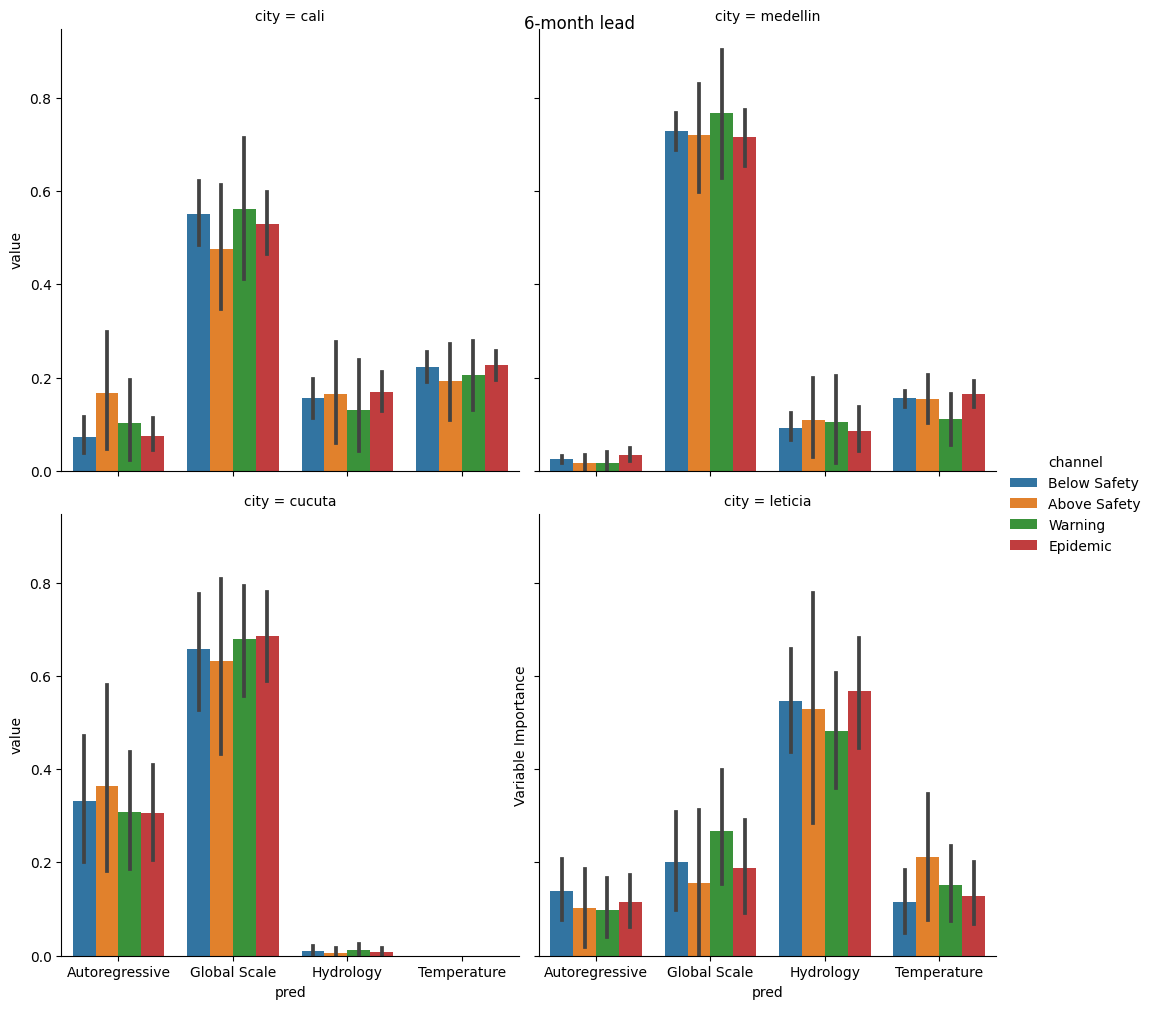

month     city            pred value  year       channel      Error
0      1.0     cali  Autoregressive     0  2007  Below Safety  -4.141162
1      1.0     cali  Autoregressive     0  2008  Below Safety  -1.827793
2      1.0     cali  Autoregressive     0  2009  Below Safety  -0.257097
3      1.0     cali  Autoregressive     0  2010      Epidemic   5.474394
4      1.0     cali  Autoregressive     0  2011  Above Safety   0.032715
...    ...      ...             ...   ...   ...           ...        ...
1642  12.0  leticia            NMME   0.0  2016  Below Safety   0.844006
1643  12.0  leticia            NMME   0.0  2017  Below Safety  -2.339028
1644  12.0  leticia            NMME   0.0  2018       Warning  -1.458067
1645  12.0  leticia            NMME   0.0  2019      Epidemic  28.991964
1646  12.0  leticia            NMME   0.0  2020       Warning  -2.602324

[1647 rows x 7 columns]

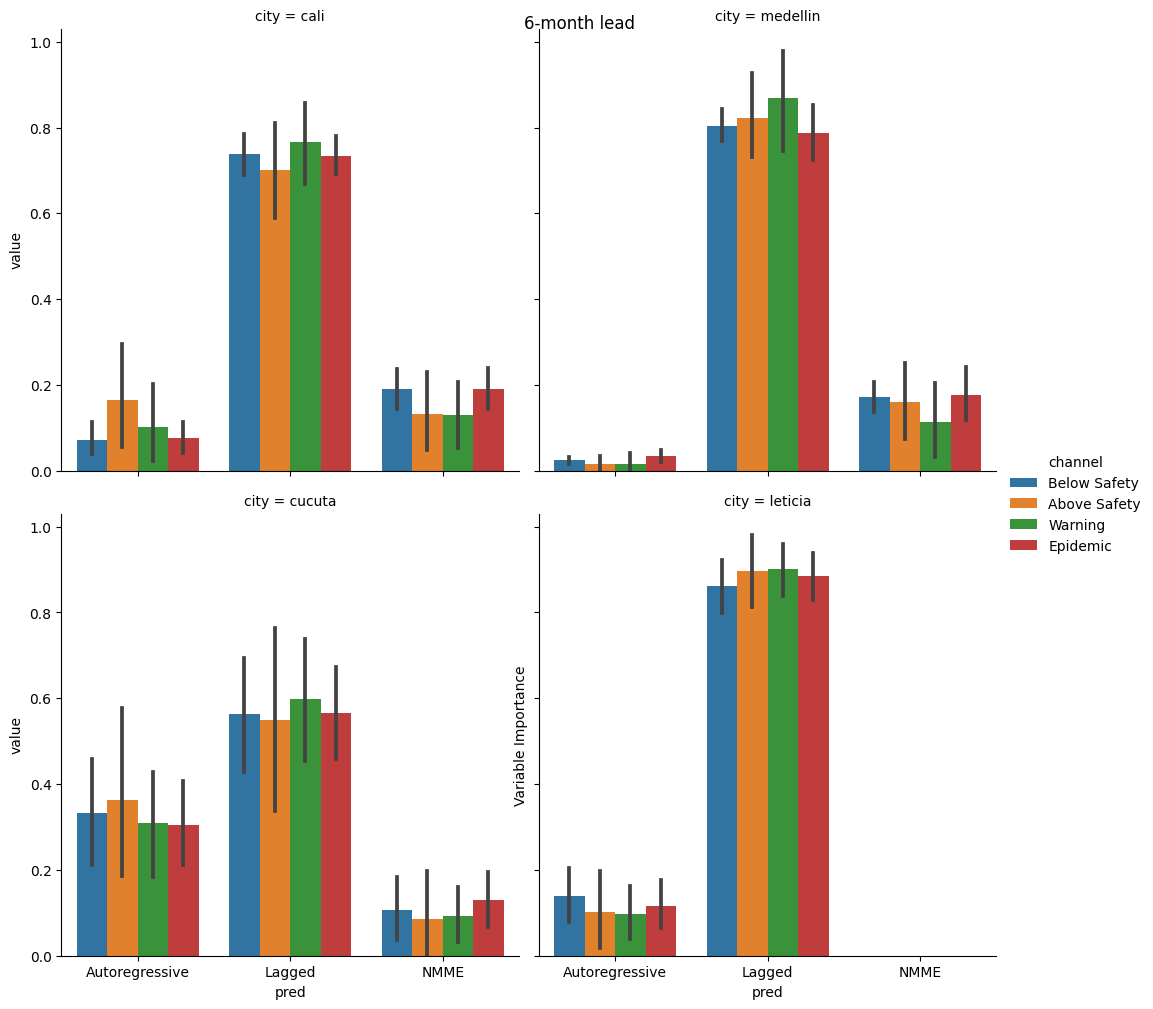

In [46]:
#by variable type
importances = pd.concat(vartypeImp)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
importancesmelt = importances.melt(id_vars=['month','city'])
importancesmelt.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_6mo.csv')

test=pd.merge(importancesmelt,dfEC[['year','month','city','channel','Error']])

sns.catplot(x='pred',y='value',hue='channel',data=test,kind='bar',col='city',col_wrap=2)
plt.ylabel('Variable Importance')
plt.suptitle('6-month lead')
plt.show()

#by source
importances = pd.concat(sourceImp)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
importancesmelt = importances.melt(id_vars=['month','city'])
importancesmelt.to_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceSource_6mo.csv')

test=pd.merge(importancesmelt,dfEC[['year','month','city','channel','Error']])

sns.catplot(x='pred',y='value',hue='channel',data=test,kind='bar',col='city',col_wrap=2)
plt.ylabel('Variable Importance')
plt.suptitle('6-month lead')
test

In [4]:
from sklearn.preprocessing import scale


def geo_mean(iterable):
    return np.exp(np.log(iterable).mean())


#by predictor
importances = pd.concat(importance)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
#importances['climate'] = 1-importances.lag_3


#by variable type
importances = pd.concat(vartypeImp)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
importancesmelt = importances.melt(id_vars=['month','city'])

DENVclim=pdt.groupby(['city','month']).cases.apply(geo_mean)
sns.catplot(x = 'month', y='value' ,hue='pred',col='city',data=importancesmelt, kind='point',height=3, aspect=1.5,col_wrap=2)
plt.ylim(-1,2)
plt.show()

#by source
importances = pd.concat(sourceImp)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
importancesmelt = importances.melt(id_vars=['month','city'])

DENVclim=pdt.groupby(['city','month']).cases.mean()
sns.catplot(x = 'month', y='value' ,hue='pred',col='city',data=importancesmelt, kind='point',height=3, aspect=1.5,col_wrap=2)
plt.ylim(-1,2)
plt.show()





test= pd.merge(importances,DENVclim,on=['month','city'])
bins = [0,geo_mean(test.cases),np.max(test.cases)]

categorical_object = pd.cut(test.cases, bins)
test['binned']=categorical_object
test=test.melt(id_vars=['month','city','cases','binned'])


sns.boxplot(y='value',x='variable',hue='binned',data=test)
plt.show()

importances = pd.concat(vartypeImp)
importances.reset_index(inplace=True)
importances.fillna(value=0,inplace=True)
test= pd.merge(importances,DENVclim,on=['month','city'])
bins = [0,geo_mean(test.cases),np.max(test.cases)]

categorical_object = pd.cut(test.cases, bins)
test['binned']=categorical_object
test=test.melt(id_vars=['month','city','cases','binned'])
sns.boxplot(y='value',x='variable',hue='binned',data=test)
plt.show()


NameError: name 'importance' is not defined

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_1mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_3mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_6mo.csv')


i1['Lead'] = '1 month'
i3['Lead'] = '3 month'
i6['Lead'] = '6 month'

iall=pd.concat([i1,i3,i6])

test=iall[iall.value>0].groupby(['Lead','city','pred']).count().reset_index()

test['PctInc']=(test.value/48)*100

test.sort_values(by=['Lead','value'],ascending=False).style

iall.groupby(['Lead','pred'])['value'].mean().reset_index().sort_values(by=['Lead','value'],ascending=False).style


iall.groupby(['Lead','pred','city'])['value'].mean().reset_index().sort_values(by=['Lead','city','value'],ascending=False).style


test.sort_values(by=['Lead','city','value'],ascending=False)

test[test.sort_values(by=['Lead','city','value'],ascending=False).pred=='TMIN']

<ipython-input-8-daa0a2cdb7c7>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test[test.sort_values(by=['Lead','city','value'],ascending=False).pred=='TMIN']


Lead      city  pred  Unnamed: 0  month  value     PctInc
22   1 month      cali  TMIN           5      5      5  10.416667
59   1 month  medellin  TMIN           2      2      2   4.166667
83   3 month      cali  TMIN           4      4      4   8.333333
114  3 month  medellin  TMIN           5      5      5  10.416667
139  6 month      cali  TMIN           5      5      5  10.416667
176  6 month  medellin  TMIN           2      2      2   4.166667

In [44]:
meanInc

month     Lead            pred  PctInc
0      1.0  1 month  Autoregressive   100.0
1      1.0  1 month    Global Scale    75.0
2      1.0  1 month       Hydrology    50.0
3      1.0  1 month     Temperature    50.0
4      1.0  3 month  Autoregressive    25.0
..     ...      ...             ...     ...
120   12.0  3 month       Hydrology    25.0
121   12.0  3 month     Temperature    50.0
122   12.0  6 month    Global Scale   100.0
123   12.0  6 month       Hydrology    50.0
124   12.0  6 month     Temperature    50.0

[125 rows x 4 columns]

In [53]:
test

Lead            pred      city  Unnamed: 0  month  value  PctInc
0   1 month  Autoregressive      cali          12     12     12   300.0
1   1 month  Autoregressive    cucuta          12     12     12   300.0
2   1 month  Autoregressive   leticia          12     12     12   300.0
3   1 month  Autoregressive  medellin          12     12     12   300.0
4   1 month    Global Scale      cali          10     10     10   250.0
5   1 month    Global Scale    cucuta           7      7      7   175.0
6   1 month    Global Scale   leticia           3      3      3    75.0
7   1 month    Global Scale  medellin           9      9      9   225.0
8   1 month       Hydrology      cali           2      2      2    50.0
9   1 month       Hydrology   leticia           7      7      7   175.0
10  1 month       Hydrology  medellin           1      1      1    25.0
11  1 month     Temperature      cali           8      8      8   200.0
12  1 month     Temperature  medellin           6      6      6   150.0
13  3 month  Autoregressive      cali          10     10     10   250.0
14  3 month  Autoregressive    cucuta          11     11     11   275.0
15  3 month  Autoregressive   leticia           6      6      6   150.0
16  3 month  Autoregressive  medellin           9      9      9   225.0
17  3 month    Global Scale      cali           9      9      9   225.0
18  3 month    Global Scale    cucuta           6      6      6   150.0
19  3 month    Global Scale   leticia           7      7      7   175.0
20  3 month    Global Scale  medellin          11     11     11   275.0
21  3 month       Hydrology      cali           5      5      5   125.0
22  3 month       Hydrology   leticia           7      7      7   175.0
23  3 month       Hydrology  medellin           1      1      1    25.0
24  3 month     Temperature      cali           8      8      8   200.0
25  3 month     Temperature  medellin           7      7      7   175.0
26  6 month  Autoregressive      cali           4      4      4   100.0
27  6 month  Autoregressive    cucuta           5      5      5   125.0
28  6 month  Autoregressive   leticia           3      3      3    75.0
29  6 month  Autoregressive  medellin           4      4      4   100.0
30  6 month    Global Scale      cali          11     11     11   275.0
31  6 month    Global Scale    cucuta           8      8      8   200.0
32  6 month    Global Scale   leticia           3      3      3    75.0
33  6 month    Global Scale  medellin          12     12     12   300.0
34  6 month       Hydrology      cali           6      6      6   150.0
35  6 month       Hydrology    cucuta           1      1      1    25.0
36  6 month       Hydrology   leticia           7      7      7   175.0
37  6 month       Hydrology  medellin           5      5      5   125.0
38  6 month     Temperature      cali           9      9      9   225.0
39  6 month     Temperature   leticia           3      3      3    75.0
40  6 month     Temperature  medellin          10     10     10   250.0

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_1mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_3mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_6mo.csv')
i1['Lead'] = '1 month'
i3['Lead'] = '3 month'
i6['Lead'] = '6 month'

iall=pd.concat([i1,i3,i6])

test=iall[iall.value>0].groupby(['city','Lead','pred']).count().reset_index()

test['PctInc']=(test.value/48)*100

test.sort_values(['city','Lead','PctInc'],ascending=False)



test['rank']=test.groupby(['city','Lead']).PctInc.rank()



rankplot=sns.catplot(x='pred',y='rank',hue='city',data=test,col='Lead',kind='bar',palette=sns.color_palette("Set2"))
for i, ax in enumerate(rankplot.axes.flatten()):
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Rank of Percent Inclusion', fontsize=10)
    if i == 1:
        ax.set_ylabel('', fontsize=10)
    if i == 3:
        ax.set_ylabel('', fontsize=10)

        
test=iall[iall.value>0].groupby(['city','Lead','pred']).count().reset_index()
print(test.value)
test['PctInc']=(test.value/12)*100
meanInc=test.groupby(['month','Lead','pred','city']).PctInc.mean().reset_index()
rankplot=sns.catplot(x='pred',y='PctInc',hue='city',data=meanInc,col='Lead',kind='bar',palette=sns.color_palette("Set2"))
for i, ax in enumerate(rankplot.axes.flatten()):
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Percent Inclusion', fontsize=10)
    if i == 1:
        ax.set_ylabel('', fontsize=10)
meanInc

NameError: name 'pd' is not defined

In [47]:
test

month     Lead            pred      city  Unnamed: 0  value  PctInc
0      1.0  1 month  Autoregressive      cali           1      1    25.0
1      1.0  1 month  Autoregressive    cucuta           1      1    25.0
2      1.0  1 month  Autoregressive   leticia           1      1    25.0
3      1.0  1 month  Autoregressive  medellin           1      1    25.0
4      1.0  1 month    Global Scale      cali           1      1    25.0
..     ...      ...             ...       ...         ...    ...     ...
284   12.0  6 month    Global Scale  medellin           1      1    25.0
285   12.0  6 month       Hydrology   leticia           1      1    25.0
286   12.0  6 month       Hydrology  medellin           1      1    25.0
287   12.0  6 month     Temperature      cali           1      1    25.0
288   12.0  6 month     Temperature  medellin           1      1    25.0

[289 rows x 7 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'GPH200PC1'),
  Text(1, 0, 'Max. Rel. Humidity (%)_lag6'),
  Text(2, 0, 'Max. Temperature (C)_lag6'),
  Text(3, 0, 'Mean Temeprature (C)_lag6'),
  Text(4, 0, 'Mean. Rel. Humidity (%)_lag6'),
  Text(5, 0, 'Min. Rel. Humidity (%)_lag6'),
  Text(6, 0, 'Min. Temperature (C)_lag6'),
  Text(7, 0, 'Nino 1+2'),
  Text(8, 0, 'Nino 1+2_lag_6'),
  Text(9, 0, 'Nino 3'),
  Text(10, 0, 'Nino 3.4'),
  Text(11, 0, 'Nino 3.4_lag6'),
  Text(12, 0, 'Nino 3.4_lag_6'),
  Text(13, 0, 'Nino 3_lag6'),
  Text(14, 0, 'Nino 3_lag_6'),
  Text(15, 0, 'Nino 4'),
  Text(16, 0, 'Nino 4_lag6'),
  Text(17, 0, 'Nino 4_lag_6'),
  Text(18, 0, 'Precipitation (mm)_lag6'),
  Text(19, 0, 'SPI_lag6'),
  Text(20, 0, 'SST_lag6_IPC1'),
  Text(21, 0, 'SST_lag6_IPC2'),
  Text(22, 0, 'TMAX'),
  Text(23, 0, 'TMIN'),
  Text(24, 0, 'lag_6'),
  Text(25, 0, 'Nino 1+2_lag6')])

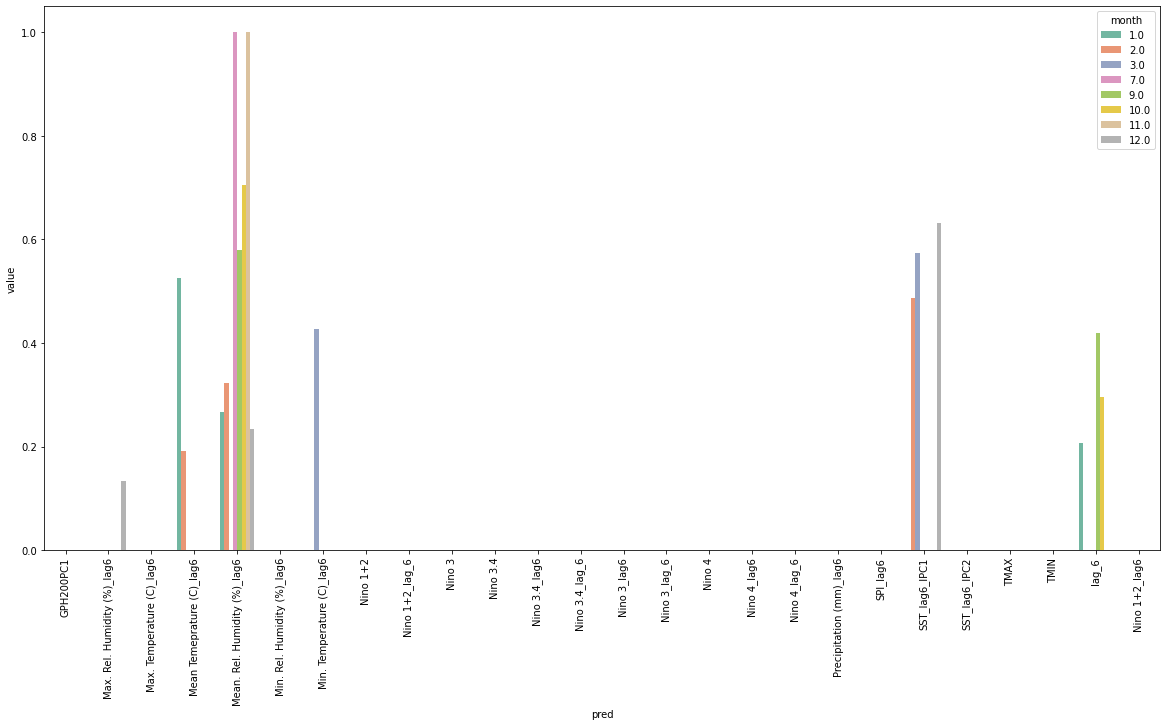

In [40]:
it6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/Importance_6mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ImportanceType_6mo.csv')

l=it6[it6.city=="leticia"]

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='pred',y='value',hue='month',data=l,palette=sns.color_palette("Set2"), ax=ax)
plt.xticks(rotation=90)

In [41]:
i1heat=i1[i1.variable=='Climate Model + AR'].pivot(index="month", columns="city", values="value")
sns.heatmap(i1heat)

AttributeError: 'DataFrame' object has no attribute 'variable'

In [1]:
i1=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_1mo.csv')
i3=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_3mo.csv')
i6=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/ModelResults/ModelR2_6mo.csv')
i1['Lead'] = '1 month'
i3['Lead'] = '3 month'
i6['Lead'] = '6 month'

iall=pd.concat([i1,i3,i6])
#iall = iall[(iall.variable=='Climate Model + AR')]
comparison=iall.pivot(index=["month","city","Lead"], columns="variable", values="value")
comparison.AR[comparison.AR<0]=0
comparison['value']=comparison['Climate Model + AR'] - comparison.AR
iall = comparison.reset_index()
iall['Made Skillful'] = (iall.AR < 0) & (iall['Climate Model + AR']>0)
iall['Made Skillful'] = (iall.value > 0) & (iall['Climate Model + AR']>0)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5),sharey=True,sharex='col') 

#df_cmat.rename(columns={'location_x':'location'}, inplace=True)
plt.rcParams.update({'font.size': 12})
for j, X in enumerate(['1 month','3 month','6 month']):

    xtick_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    cityNames = ['Cali','Cucuta','Leticia','Medellin']

    #choose = [x for x in matrix.columns if name in x]
    heat=iall[(iall.Lead==X)].pivot(index="month", columns="city", values="value")
    ms = iall[(iall.Lead==X)].pivot(index="month", columns="city", values="Made Skillful")
    sns.heatmap(heat,mask=~ms,ax=ax[j],linewidths=0.01,cmap=sns.color_palette('light:purple',as_cmap=True),vmin=0,vmax=1,
               linecolor='darkgray')
    ax[j].set_title(str(X)+' lead')
    ax[j].set_yticks(range(len(xtick_names)))
    ax[j].set_yticklabels(xtick_names,rotation=45)
    ax[j].set_xticklabels(cityNames,rotation=45)
    ax[j].set_ylabel('')
    
fig.tight_layout()
    


NameError: name 'pd' is not defined

In [ ]:
iall['Made Skillful']
iall.groupby(['Lead','city','Made Skillful']).value.count()
#iall.groupby(['Lead','city','Made Skillful']).value.mean()